#### Setup

In [ ]:
!pip install -U tensorflow keras

In [ ]:
!pip install -U talos

In [ ]:
!pip install -U fasttext

In [ ]:
# Import general Python libraries
import pandas as pd
import numpy as np
import random
import sklearn
import seaborn as sns
import os
import io
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# Specify seeds for random-operations
seed_value = 0
os.environ['PYTHONHASHSEED']=str(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

In [ ]:
# Import sklearn-specific modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
# Import tensorflow-specific modules
import tensorflow as tf
tf.random.set_seed(seed_value)
print("Tensorflow Version: {}".format(tf.__version__))
print("Keras Version: {}".format(tf.keras.__version__))

Tensorflow Version: 2.4.1
Keras Version: 2.4.0


In [ ]:
# Import keras-specific modules
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dropout, BatchNormalization, LayerNormalization, GaussianNoise, Activation
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Average, Embedding, Conv1D, MaxPool1D, AvgPool1D, GlobalMaxPool1D, GlobalAvgPool1D, RNN, GRU, LSTM, SeparableConv1D, SimpleRNN, Bidirectional, LocallyConnected1D, LeakyReLU, Input
from tensorflow.keras.optimizers import Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform, LecunNormal, LecunUniform, HeNormal, HeUniform, Constant
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.utils import plot_model
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Set pandas options
pd.set_option("display.max_columns", None)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set up TPU configurations
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.104.58.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.104.58.10:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]


#### Data Preparation:

In [ ]:
# Import Word Embeddings
import fasttext, fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
print(ft.get_dimension())

300


In [ ]:
# Import Kickstarter Dataset
kickstarter_df = pd.read_csv("04_Final Datasets/Kickstarter_Structured_and_Text.csv", index_col=0)
print(kickstarter_df.shape)
print(len(kickstarter_df.index.unique()))
kickstarter_df.head(1)

(246891, 41)
246891


,campaign_successful,title,blurb,story,risks,reward_description,creator_bio,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category
22821161,0,sentio golf putters. feel is the difference,choose the feel you want with our patented flo...,sentio putters feature a unique floating face...,high tech process although we have made severa...,our eternal gratitude. every little bit helps ...,sentio golf is driven to produce the most adva...,50000.0,0,45,102,3,0,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design


In [ ]:
# Merge Text Attributes Together
kickstarter_df["text"] = kickstarter_df["title"] + " " + kickstarter_df["blurb"] + " " + kickstarter_df["story"] + " " + kickstarter_df["risks"] + " " + kickstarter_df["creator_bio"] + " " + kickstarter_df["reward_description"]
kickstarter_df.drop(columns=["title", "blurb", "story", "risks", "creator_bio", "reward_description"], inplace=True)
print(kickstarter_df.shape)
kickstarter_df.head(1)

(246891, 36)


,campaign_successful,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category,text
22821161,0,50000.0,0,45,102,3,0,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design,sentio golf putters. feel is the difference ch...


In [ ]:
# Remove stopwords and punctation from text
stopwords = set(list(ENGLISH_STOP_WORDS) + ["s"])
kickstarter_df["text"] = kickstarter_df.text.str.replace(r"\.", "")
kickstarter_df["text"] = kickstarter_df.text.progress_apply(lambda x: " ".join([token for token in x.split() if token not in stopwords]))

100%|██████████| 246891/246891 [00:37<00:00, 6626.11it/s]


In [ ]:
# Convert categorical features into dummy-variables
print("Before: {}".format(kickstarter_df.shape))
kickstarter_df["launch_quartal"] = kickstarter_df.launch_quartal.apply(str)
kickstarter_df = pd.get_dummies(kickstarter_df, prefix=["launch_quartal", "location", "category"], columns=["launch_quartal", "location", "category"], drop_first=False)
print("After: {}".format(kickstarter_df.shape))
kickstarter_df.head(1)

Before: (246891, 36)
After: (246891, 235)


,campaign_successful,goal,number_of_collaborators,funding_period,days_between_created_and_launched,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,text,launch_quartal_1,launch_quartal_2,launch_quartal_3,launch_quartal_4,location_Africa,location_Australia,location_Belgium,location_Canada,location_China,location_Denmark,location_France,location_Germany,location_Hong Kong,location_Ireland,location_Italy,location_Japan,location_Latin and South America,location_Mexico,location_Netherlands,location_New Zealand,location_No Location,location_Norway,location_Oceania and Antarctica,location_Rest of Asia,location_Rest of Europe,location_Singapore,location_Spain,location_Sweden,location_Switzerland,location_United Kingdom,location_United States,category_Art_Ceramics,category_Art_Conceptual Art,category_Art_Digital Art,category_Art_Illustration,category_Art_Installations,category_Art_Mixed Media,category_Art_No Subcategory,category_Art_Painting,category_Art_Performance Art,category_Art_Public Art,category_Art_Sculpture,category_Art_Social Practice,category_Art_Textiles,category_Art_Video Art,category_Comics_Anthologies,category_Comics_Comic Books,category_Comics_Events,category_Comics_Graphic Novels,category_Comics_No Subcategory,category_Comics_Webcomics,category_Crafts_Candles,category_Crafts_Crochet,category_Crafts_DIY,category_Crafts_Embroidery,category_Crafts_Glass,category_Crafts_Knitting,category_Crafts_No Subcategory,category_Crafts_Pottery,category_Crafts_Printing,category_Crafts_Quilts,category_Crafts_Stationery,category_Crafts_Taxidermy,category_Crafts_Weaving,category_Crafts_Woodworking,category_Dance_No Subcategory,category_Dance_Performances,category_Dance_Residencies,category_Dance_Spaces,category_Dance_Workshops,category_Design_Architecture,category_Design_Civic Design,category_Design_Graphic Design,category_Design_Interactive Design,category_Design_No Subcategory,category_Design_Product Design,category_Design_Toys,category_Design_Typography,category_Fashion_Accessories,category_Fashion_Apparel,category_Fashion_Childrenswear,category_Fashion_Couture,category_Fashion_Footwear,category_Fashion_Jewelry,category_Fashion_No Subcategory,category_Fashion_Pet Fashion,category_Fashion_Ready-to-wear,category_Film & Video_Action,category_Film & Video_Animation,category_Film & Video_Comedy,category_Film & Video_Documentary,category_Film & Video_Drama,category_Film & Video_Experimental,category_Film & Video_Family,category_Film & Video_Fantasy,category_Film & Video_Festivals,category_Film & Video_Horror,category_Film & Video_Movie Theaters,category_Film & Video_Music Videos,category_Film & Video_Narrative Film,category_Film & Video_No Subcategory,category_Film & Video_Romance,category_Film & Video_Science Fiction,category_Film & Video_Shorts,category_Film & Video_Television,category_Film & Video_Thrillers,category_Film & Video_Webseries,category_Food_Bacon,category_Food_Community Gardens,category_Food_Cookbooks,category_Food_Drinks,category_Food_Events,category_Food_Farmer's Markets,category_Food_Farms,category_Food_Food Trucks,category_Food_No Subcategory,category_Food_Restaurants,category_Food_Small Batch,category_Food_Spaces,category_Food_Vegan,category_Games_Gaming Hardware,category_Games_Live Games,category_Games_Mobile Games,category_Games_No Subcategory,category_Games_Playing Cards,category_Games_Puzzles,category_Games_Tabletop Games,category_Games_Video Games,category_Journalism_Audio,category_Journalism_No Subcategory,cate

In [ ]:
# Convert dataset and target variable to Numpy Arrays
y = kickstarter_df["campaign_successful"].to_numpy()
kickstarter_df.drop(columns=["campaign_successful"], inplace=True)
X = kickstarter_df.to_numpy()

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(246891,)
<class 'numpy.ndarray'>
(246891, 234)


In [ ]:
# Retrieve column names which will be used for later pre-processing and evaluation
feature_names = kickstarter_df.columns.values
text_feature_names = "text"
numeric_feature_names = ["goal", "number_of_collaborators", "funding_period", "days_between_created_and_launched", "number_of_images", "number_of_videos", "number_of_audios", "number_of_interactives", "number_of_words", "number_of_links", "number_of_creator_backings", "number_of_creator_projects", "number_of_rewards", "number_of_words_per_reward", "lowest_pledge_level", "highest_pledge_level", "avg_months_until_reward"]
binary_feature_names = [x for x in feature_names if (x not in numeric_feature_names) & (x != text_feature_names)]
text_features = kickstarter_df.columns.get_loc(text_feature_names)
numeric_features = [kickstarter_df.columns.get_loc(x) for x in numeric_feature_names]
binary_features = [kickstarter_df.columns.get_loc(x) for x in binary_feature_names]
print(len(numeric_feature_names)+len(binary_feature_names) + 1)

234


In [ ]:
# Split dataset into training, subtraining, validation, and test set
train_size = round(kickstarter_df.shape[0]*0.7*1)
val_size = round(kickstarter_df.shape[0]*0.15*1)
test_size = round(kickstarter_df.shape[0]*1) - val_size - train_size

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(train_size+val_size), test_size=test_size, shuffle=True, stratify=y, random_state=seed_value)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, train_size=train_size, test_size=val_size, shuffle=True, stratify=y_train, random_state=seed_value)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_subtrain: {}".format(X_subtrain.shape))
print("Shape of y_subtrain: {}".format(y_subtrain.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of y_val: {}".format(y_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (209858, 234)
Shape of y_train: (209858,)
Shape of X_subtrain: (172824, 234)
Shape of y_subtrain: (172824,)
Shape of X_val: (37034, 234)
Shape of y_val: (37034,)
Shape of X_test: (37033, 234)
Shape of y_test: (37033,)


In [ ]:
# Split dataset into LR and NN related features
X_train_lr = X_train
X_train_nn = X_train
X_test_lr = X_test
X_test_nn = X_test

In [ ]:
# Create a dummy transformer that simply returns the original column (used for binary features)
class NoTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, np.ndarray)
        return X

In [ ]:
# Pre-process NN-related features
preprocessing = ColumnTransformer(
    [
      ("numeric", Pipeline([
                            ("powertransform", PowerTransformer(method="yeo-johnson", standardize=True)),
                            ("pca", PCA())
                          ]), numeric_features),
      ("binary", NoTransformer(), binary_features)
    ],
    remainder="passthrough", verbose=True, n_jobs=-1).fit(X_train_nn)

X_train_nn = preprocessing.transform(X_train_nn)
X_test_nn = preprocessing.transform(X_test_nn)

In [ ]:
# Pre-process LR-related features
preprocessing = ColumnTransformer(
    [
      ("numeric", PowerTransformer(method="yeo-johnson", standardize=True), numeric_features),
      ("binary", NoTransformer(), binary_features),
      ("text_lr", TfidfVectorizer(ngram_range=(1,2), analyzer="word", max_features=75000, sublinear_tf=True, dtype=np.float32), text_features)
    ], remainder="drop", verbose=True).fit(X_train_lr)

X_train_lr = preprocessing.transform(X_train_lr)
X_test_lr = preprocessing.transform(X_test_lr)

[ColumnTransformer] ....... (1 of 3) Processing numeric, total=   5.7s
[ColumnTransformer] ........ (2 of 3) Processing binary, total=   0.0s
[ColumnTransformer] ....... (3 of 3) Processing text_lr, total= 7.9min


In [ ]:
# Re-arrange feature_names, since they have been changed by the ColumnTransformer
feature_names_structured = numeric_feature_names + binary_feature_names
feature_names_text = ["token_" + token for token in preprocessing.named_transformers_["text_lr"].get_feature_names()]
feature_names_both = feature_names_structured + feature_names_text

In [ ]:
# Split NN-related dataset into structured and text features
X_train_nn_structured = X_train_nn[:,0:233].astype("float32")
X_train_nn_text = X_train_nn[:,233]
X_test_nn_structured = X_test_nn[:,0:233].astype("float32")
X_test_nn_text = X_test_nn[:,233]

print("Shape of X_train_nn_structured: {}".format(X_train_nn_structured.shape))
print("Shape of X_train_nn_text: {}".format(X_train_nn_text.shape))
print("Shape of X_train_lr: {}".format(X_train_lr.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test_nn_structured: {}".format(X_test_nn_structured.shape))
print("Shape of X_test_nn_text: {}".format(X_test_nn_text.shape))
print("Shape of X_test_lr: {}".format(X_test_lr.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train_nn_structured: (209858, 233)
Shape of X_train_nn_text: (209858,)
Shape of X_train_lr: (209858, 75233)
Shape of y_train: (209858,)
Shape of X_test_nn_structured: (37033, 233)
Shape of X_test_nn_text: (37033,)
Shape of X_test_lr: (37033, 75233)
Shape of y_test: (37033,)


In [ ]:
# Split LR-related dataset into structured and text features
X_train_lr_structured = X_train_lr[:,0:233].astype("float32")
X_train_lr_text = X_train_lr[:,233:]
X_test_lr_structured = X_test_lr[:,0:233].astype("float32")
X_test_lr_text = X_test_lr[:,233:]

In [ ]:
# Define parameters for text processing 
max_features = 714542
max_len = 1000
embedding_dim = 300

In [ ]:
# Convert Texts Into Integer Sequences (Tokenization)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_nn_text)
X_train_nn_text = tokenizer.texts_to_sequences(X_train_nn_text)
X_test_nn_text = tokenizer.texts_to_sequences(X_test_nn_text)
word_index = tokenizer.word_index
print("Included Token: {}".format(len(word_index)))

Included Token: 714541


In [ ]:
# Determine number of words for max_len
num_words = pd.DataFrame([len(x) for x in X_train_nn_text])
num_words.rename(columns={0:"words"}, inplace=True)
num_words.describe()

,words
count,209858.000000
mean,509.782634
std,408.516227
min,14.000000
25%,241.000000
50%,399.000000
75%,650.000000
max,11553.000000


In [ ]:
# Pad and Truncate sequences
X_train_nn_text = pad_sequences(X_train_nn_text, maxlen=max_len, padding="pre", truncating="post")
X_test_nn_text = pad_sequences(X_test_nn_text, maxlen=max_len, padding="pre", truncating="post")

print("Shape of X_train_nn_text: {}".format(X_train_nn_text.shape))
print("Shape of X_test_nn_text: {}".format(X_test_nn_text.shape))

Shape of X_train_nn_text: (209858, 1000)
Shape of X_test_nn_text: (37033, 1000)


In [ ]:
# Prepare the Embedding Matrix
print('Preparing Embedding Matrix...')
words_not_found = []
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
      embedding_vector = ft.get_word_vector(word)
      if (embedding_vector is not None) and len(embedding_vector) > 0:
        embedding_matrix[i] = embedding_vector
      else:
        words_not_found.append(word)
print('Shape of Embedding Matrix: {}'.format(embedding_matrix.shape))
print('Number of Null Word Embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Preparing Embedding Matrix...
Shape of Embedding Matrix: (714542, 300)
Number of Null Word Embeddings: 248


#### Evaluation: Logistic Regression vs. Neural Networks

##### Best-Found LR Structured:

In [ ]:
# Best LR Structured
best_lr_structured = Sequential()
best_lr_structured.add(Dense(1, activation="sigmoid", kernel_regularizer=L1(l1=0.0000), kernel_initializer=GlorotNormal(seed=seed_value)))
best_lr_structured.compile(optimizer=RMSprop(centered=True), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])
history = best_lr_structured.fit(X_train_lr_structured, y_train, batch_size=512, epochs=23, verbose=1)

In [ ]:
# Evaluate Generalization Performance
training_results = best_lr_structured.evaluate(X_train_lr_structured, y_train, batch_size=512, verbose=0)
test_results = best_lr_structured.evaluate(X_test_lr_structured, y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.423,0.796,0.731,0.661,0.694,0.543,0.872
Test Set,0.431,0.790,0.721,0.652,0.684,0.530,0.866


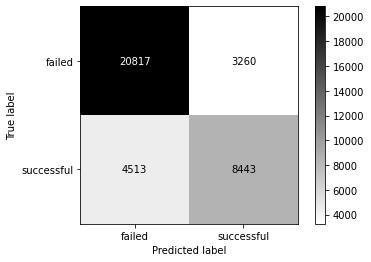

In [ ]:
# Plot confusion matrix
y_pred = best_lr_structured.predict_classes(X_test_lr_structured, batch_size=512, verbose=0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Best-Found LR Text:

In [ ]:
# Best LR Text
best_lr_text = Sequential()
best_lr_text.add(Input(shape=(75000,), sparse=True, batch_size=512))
best_lr_text.add(Dense(1, activation="sigmoid", kernel_initializer=GlorotNormal(seed=seed_value)))
best_lr_text.compile(optimizer=RMSprop(), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])
history = best_lr_text.fit(X_train_lr_text, y_train, batch_size=512, epochs=29, verbose=1)

In [ ]:
# Evaluate Generalization Performance
training_results = best_lr_text.evaluate(X_train_lr_text, y_train, batch_size=512, verbose=0)
test_results = best_lr_text.evaluate(X_test_lr_text, y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.366,0.840,0.808,0.711,0.756,0.641,0.911
Test Set,0.447,0.787,0.727,0.628,0.673,0.521,0.856


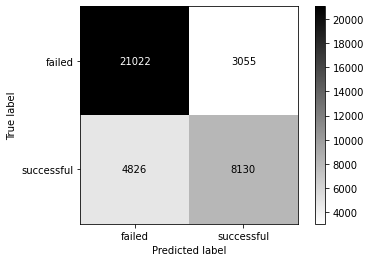

In [ ]:
# Plot confusion matrix
y_pred = best_model.predict_classes(X_test_lr_text, batch_size=512, verbose=0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Best-Found LR Structured + Text:

In [ ]:
# Best LR Text + Structured
best_lr_both = Sequential()
best_lr_both.add(Input(shape=(X_train_lr.shape[1],), sparse=True, batch_size=512))
best_lr_both.add(Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value)))
best_lr_both.compile(optimizer=Adam(amsgrad=True), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])
history = best_lr_both.fit(X_train_lr, y_train, batch_size=512, epochs=14, verbose=1)

In [ ]:
# Evaluate Generalization Performance
training_results = best_lr_both.evaluate(X_train_lr, y_train, batch_size=512, verbose=0)
test_results = best_lr_both.evaluate(X_test_lr, y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.326,0.856,0.812,0.764,0.787,0.679,0.931
Test Set,0.371,0.825,0.768,0.716,0.741,0.610,0.904


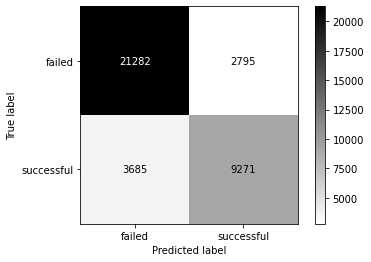

In [ ]:
# Plot confusion matrix
y_pred = best_lr_both.predict_classes(X_test_lr, batch_size=512, verbose=0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Best-Found NN Structured:

In [ ]:
# Best NN Structured
best_nn_structured = Sequential()
best_nn_structured.add(Dense(500, activation="gelu", kernel_initializer=HeUniform(seed=seed_value)))
best_nn_structured.add(Dropout(rate=0.5, seed=seed_value))
best_nn_structured.add(Dense(350, activation="gelu", kernel_initializer=HeUniform(seed=seed_value)))
best_nn_structured.add(Dropout(rate=0.5, seed=seed_value))
best_nn_structured.add(Dense(245, activation="gelu", kernel_initializer=HeUniform(seed=seed_value)))
best_nn_structured.add(Dropout(rate=0.5, seed=seed_value))
best_nn_structured.add(Dense(1, activation="sigmoid", kernel_initializer=HeUniform(seed=seed_value)))
best_nn_structured.compile(optimizer=RMSprop(), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])
history = best_nn_structured.fit(X_train_nn_structured, y_train, batch_size=512, epochs=22, verbose=1, shuffle=True)

Epoch 1/22
410/410 [==============================] - 19s 42ms/step - loss: 0.4766 - binary_accuracy: 0.7633 - precision_6: 0.6735 - recall_6: 0.6285 - f1score: 0.6457 - matthews: 0.4722 - auc_6: 0.8302
Epoch 2/22
410/410 [==============================] - 17s 42ms/step - loss: 0.4262 - binary_accuracy: 0.7956 - precision_6: 0.7199 - recall_6: 0.6855 - f1score: 0.7014 - matthews: 0.5474 - auc_6: 0.8697
Epoch 3/22
410/410 [==============================] - 17s 42ms/step - loss: 0.4189 - binary_accuracy: 0.7987 - precision_6: 0.7250 - recall_6: 0.6894 - f1score: 0.7063 - matthews: 0.5544 - auc_6: 0.8744
Epoch 4/22
410/410 [==============================] - 17s 42ms/step - loss: 0.4143 - binary_accuracy: 0.8018 - precision_6: 0.7306 - recall_6: 0.6926 - f1score: 0.7106 - matthews: 0.5611 - auc_6: 0.8775
Epoch 5/22
410/410 [==============================] - 18s 44ms/step - loss: 0.4137 - binary_accuracy: 0.8036 - precision_6: 0.7315 - recall_6: 0.6914 - f1score: 0.7103 - matthews: 0.5630 -

In [ ]:
# Evaluate Generalization Performance
training_results = best_nn_structured.evaluate(X_train_nn_structured, y_train, batch_size=512, verbose=0)
test_results = best_nn_structured.evaluate(X_test_nn_structured, y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.383,0.819,0.740,0.744,0.742,0.603,0.897
Test Set,0.412,0.803,0.718,0.721,0.719,0.568,0.880


In [ ]:
# Show summary of the network
best_nn_structured.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               117000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 350)               175350    
_________________________________________________________________
dropout_7 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 245)               85995     
_________________________________________________________________
dropout_8 (Dropout)          (None, 245)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

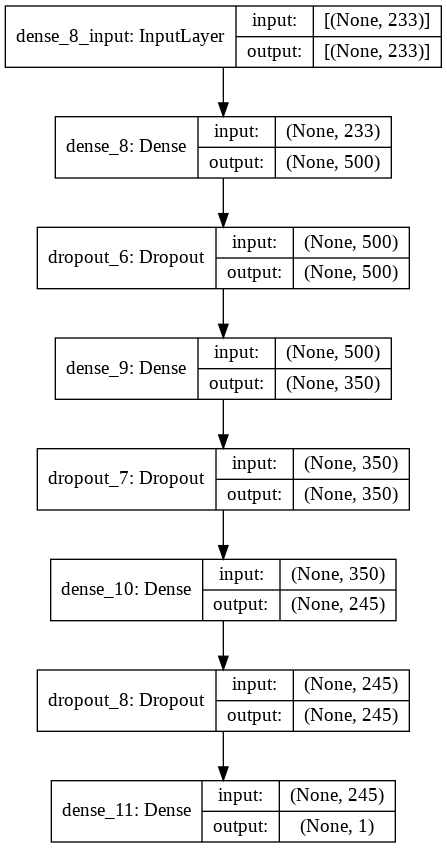

In [ ]:
# Visualize Best Model
plot_model(best_nn_structured, to_file='best_nn_structured.png', show_shapes=True, show_layer_names=True)

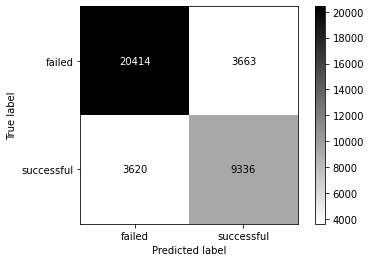

In [ ]:
# Plot confusion matrix
y_pred = best_nn_structured.predict_classes(X_test_nn_structured, batch_size=512, verbose=0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Best-Found NN Text (CNN):

In [ ]:
# Define the CNN
def create_model():
  model = Sequential()
  model.add(Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
  model.add(Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value)))
  model.add(AvgPool1D(2))
  model.add(GaussianNoise(stddev=0.1))
  model.add(LayerNormalization())
  model.add(Dropout(rate=0.5, seed=seed_value))
  model.add(Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value)))
  model.add(AvgPool1D(2))
  model.add(GaussianNoise(stddev=0.1))
  model.add(LayerNormalization())
  model.add(Dropout(rate=0.5, seed=seed_value))
  model.add(Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value)))
  model.add(AvgPool1D(2))
  model.add(GaussianNoise(stddev=0.1))
  model.add(LayerNormalization())
  model.add(Dropout(rate=0.5, seed=seed_value))
  model.add(Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value)))
  model.add(AvgPool1D())
  model.add(GaussianNoise(stddev=0.1))
  model.add(LayerNormalization())
  model.add(Dropout(rate=0.5, seed=seed_value))
  model.add(Flatten())
  model.add(Dense(32, activation='relu', kernel_initializer=GlorotUniform(seed=seed_value)))
  model.add(GaussianNoise(stddev=0.1))
  model.add(LayerNormalization())
  model.add(Dropout(rate=0.5, seed=seed_value))
  model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=seed_value)))
  return model

In [ ]:
# Compile the CNN
with strategy.scope():
  best_cnn_text = create_model()
  best_cnn_text.compile(optimizer=Nadam(), loss="binary_crossentropy", steps_per_execution=200, metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Show summary of the model
best_cnn_text.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 300)         214362300 
_________________________________________________________________
conv1d (Conv1D)              (None, 1000, 64)          96064     
_________________________________________________________________
average_pooling1d (AveragePo (None, 500, 64)           0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 500, 64)           0         
_________________________________________________________________
layer_normalization (LayerNo (None, 500, 64)           128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 64)          

In [ ]:
# Train the CNN
best_cnn_text.fit(X_train_nn_text, y_train, validation_data=(X_test_nn_text, y_test), batch_size=512, epochs=46, verbose=1, shuffle=True)

In [ ]:
# Evaluate Generalization Performance
training_results = best_cnn_text.evaluate(X_train_nn_text, y_train, batch_size=512, verbose=0)
test_results = best_cnn_text.evaluate(X_test_nn_text, y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.392,0.818,0.762,0.699,0.724,0.593,0.891
Test Set,0.462,0.782,0.708,0.640,0.667,0.512,0.848


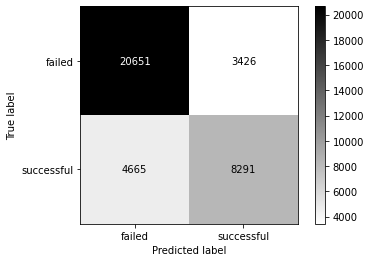

In [ ]:
# Plot confusion matrix
y_pred = best_cnn_text.predict_classes(X_test_nn_text, batch_size=512, verbose=0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Best-Found Text (RNN):

In [ ]:
# Define the RNN
def create_model():
  model = Sequential()
  model.add(Embedding(max_features, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_len, trainable=False))
  model.add(GRU(256, kernel_initializer=GlorotUniform(seed=seed_value), dropout=0.5, recurrent_dropout=0.5))
  model.add(Dropout(rate=0.5, seed=seed_value))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
# Compile the RNN
with strategy.scope():
  best_rnn_text = create_model()
  best_rnn_text.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", steps_per_execution=410, metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Show summary of the model
best_rnn_text.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 300)         214362300 
_________________________________________________________________
gru_4 (GRU)                  (None, 256)               428544    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 214,791,101
Trainable params: 428,801
Non-trainable params: 214,362,300
_________________________________________________________________


In [ ]:
# Train the model
best_rnn_text.fit(X_train_nn_text, y_train, validation_data=(X_test_nn_text, y_test), batch_size=512, epochs=37, verbose=1, shuffle=True)

In [ ]:
# Evaluate Generalization Performance
training_results = best_rnn_text.evaluate(X_train_nn_text, y_train, batch_size=512, verbose=0)
test_results = best_rnn_text.evaluate(X_test_nn_text, y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.389,0.822,0.762,0.714,0.732,0.602,0.894
Test Set,0.448,0.787,0.710,0.659,0.679,0.524,0.854


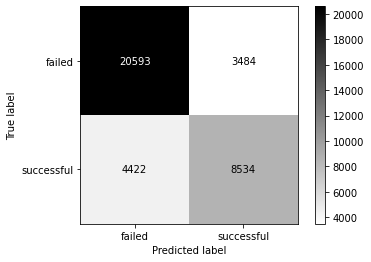

In [ ]:
# Plot confusion matrix
y_pred = best_rnn_text.predict_classes(X_test_nn_text, batch_size=512, verbose=0)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Best-Found Model: NN Structured + Text (CNN-Based)

In [ ]:
# Define the CNN
def create_model():
  # Inputs
  input_structured = Input(shape=(233,))
  input_text = Input(shape=(max_len,))

  # Text Branch
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_text)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(embeddings)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D()(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Flatten()(cnn)
  cnn = Dense(490, activation='gelu', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  output_cnn = Dropout(rate=0.5, seed=seed_value)(cnn)

  # Structured Branch
  mlp = Dense(500, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(input_structured)
  mlp = Dropout(rate=0.5, seed=seed_value)(mlp)
  mlp = Dense(350, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(mlp)
  mlp = Dropout(rate=0.5, seed=seed_value)(mlp)
  mlp = Dense(245, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(mlp)
  output_mlp = Dropout(rate=0.5, seed=seed_value)(mlp)

  # Concatenate Features
  concat = Concatenate()([output_mlp, output_cnn])

  # Dense Classifier
  dense = Dense(256, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(concat)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(64, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  output = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(dense)

  # Define model
  model = Model([input_structured, input_text], output)
  return model

In [ ]:
# Compile the CNN
with strategy.scope():
  best_cnn_both = create_model()
  best_cnn_both.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", steps_per_execution=410, metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Plot model
plot_model(best_cnn_both, show_shapes=True, show_layer_names=True)

In [ ]:
# Show summary of the model
best_cnn_both.summary()

In [ ]:
# Train the CNN
best_cnn_both.fit([X_train_nn_structured, X_train_nn_text], y_train, validation_data=([X_test_nn_structured, X_test_nn_text], y_test), batch_size=512, epochs=21, verbose=1, shuffle=True)

In [ ]:
# Evaluate Generalization Performance
training_results = best_cnn_both.evaluate([X_train_nn_structured, X_train_nn_text], y_train, batch_size=512, verbose=0)
test_results = best_cnn_both.evaluate([X_test_nn_structured, X_test_nn_text], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.334,0.846,0.781,0.776,0.775,0.660,0.922
Test Set,0.377,0.825,0.754,0.739,0.742,0.611,0.902


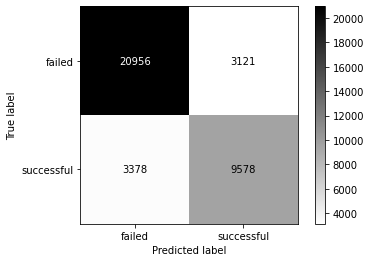

In [ ]:
# Plot confusion matrix
y_pred = best_cnn_both.predict([X_test_nn_structured, X_test_nn_text], batch_size=512, verbose=0)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Best-Found Model: NN Structured + Text (RNN-Based)

In [ ]:
# Define the RNN
def create_model():
  # Inputs
  input_structured = Input(shape=(233,))
  input_text = Input(shape=(max_len,))

  # Text Branch
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_text)
  rnn = GRU(256, kernel_initializer=GlorotUniform(seed=seed_value), dropout=0.5, recurrent_dropout=0.5)(embeddings)
  output_rnn = Dropout(rate=0.5, seed=seed_value)(rnn)

  # Merge RNN output to Structured Features
  concat = Concatenate()([input_structured, output_rnn])

  # Dense Classifier
  dense = Dense(500, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(concat)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(350, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(245, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  output = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(dense)

  # Define model
  model = Model([input_structured, input_text], output)
  return model

In [ ]:
# Compile the RNN
with strategy.scope():
  best_rnn_both = create_model()
  best_rnn_both.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", steps_per_execution=200, metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Plot model
plot_model(best_rnn_both, show_shapes=True, show_layer_names=True)

In [ ]:
# Show summary of the model
best_rnn_both.summary()

In [ ]:
# Train the RNN
best_rnn_both.fit([X_train_nn_structured, X_train_nn_text], y_train, validation_data=([X_test_nn_structured, X_test_nn_text], y_test), batch_size=512, epochs=32, verbose=1, shuffle=True)

In [ ]:
# Evaluate Generalization Performance
training_results = best_rnn_both.evaluate([X_train_nn_structured, X_train_nn_text], y_train, batch_size=512, verbose=0)
test_results = best_rnn_both.evaluate([X_test_nn_structured, X_test_nn_text], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.304,0.868,0.811,0.812,0.808,0.71,0.941
Test Set,0.373,0.828,0.756,0.750,0.748,0.62,0.904


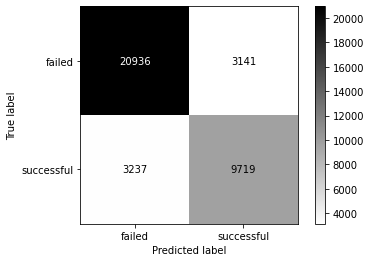

In [ ]:
# Plot confusion matrix
y_pred = best_rnn_both.predict([X_test_nn_structured, X_test_nn_text], batch_size=512, verbose=0)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Compare ROC Curves: LR vs. NN

###### Structured Data:

In [ ]:
# Calculate values needed for ROC curve
y_pred_lr = best_lr_structured.predict(X_test_lr_structured).ravel()
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
y_pred_nn = best_nn_structured.predict(X_test_nn_structured).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn)

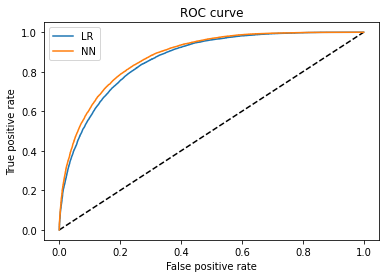

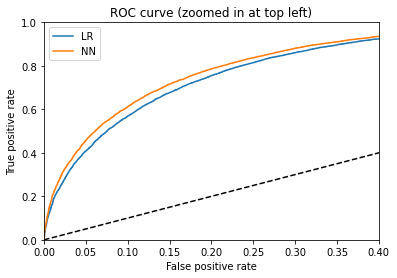

In [ ]:
# Plot ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_nn, tpr_nn, label='NN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.
plt.figure(1)
plt.xlim(0, 0.4)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_nn, tpr_nn, label='NN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###### Text Data:

In [ ]:
# Calculate values needed for ROC curve
y_pred_lr = best_lr_text.predict(X_test_lr_text).ravel()
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
y_pred_cnn = best_cnn_text.predict(X_test_nn_text).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
y_pred_rnn = best_rnn_text.predict(X_test_nn_text).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)

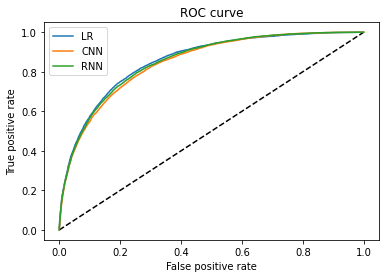

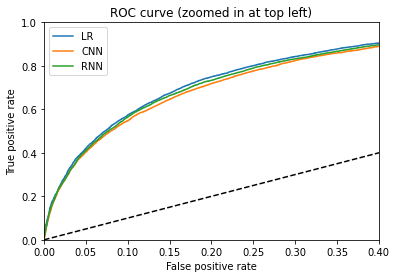

In [ ]:
# Plot ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_cnn, tpr_cnn, label='CNN')
plt.plot(fpr_rnn, tpr_rnn, label='RNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.
plt.figure(1)
plt.xlim(0, 0.4)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_cnn, tpr_cnn, label='CNN')
plt.plot(fpr_rnn, tpr_rnn, label='RNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###### Structured + Text Data:

In [ ]:
# Calculate values needed for ROC curve
y_pred_lr = best_lr_both.predict(X_test_lr).ravel()
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
y_pred_cnn = best_cnn_both.predict([X_test_nn_structured, X_test_nn_text]).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
y_pred_rnn = best_rnn_both.predict([X_test_nn_structured, X_test_nn_text]).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)

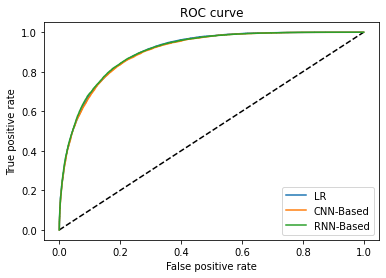

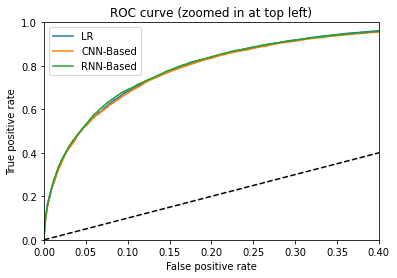

In [ ]:
# Plot ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_cnn, tpr_cnn, label='CNN-Based')
plt.plot(fpr_rnn, tpr_rnn, label='RNN-Based')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.
plt.figure(1)
plt.xlim(0, 0.4)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_cnn, tpr_cnn, label='CNN-Based')
plt.plot(fpr_rnn, tpr_rnn, label='RNN-Based')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

#### Test Wide and Deep Model:

##### Combine RNN-Model with LR:

###### a) Average Ensemble

In [ ]:
# Define the model
def create_model():
  # Inputs
  input_nn_structured = Input(shape=(233,))
  input_nn_text = Input(shape=(max_len,))
  input_lr = Input(shape=(75233,), sparse=True)

  # Text Branch RNN
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_nn_text)
  rnn = GRU(256, kernel_initializer=GlorotUniform(seed=seed_value), dropout=0.5)(embeddings)
  output_rnn = Dropout(rate=0.5, seed=seed_value)(rnn)

  # Merge RNN output to Structured Features of NN
  concat = Concatenate()([input_nn_structured, output_rnn])

  # Dense Classifier NN
  dense = Dense(500, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(concat)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(350, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(245, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  output_nn = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(dense)

  # LR
  output_lr = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(input_lr)

  # Average Predictions
  output = Average()([output_nn, output_lr])

  # Define model
  model = Model([input_nn_structured, input_nn_text, input_lr], output)
  return model

In [ ]:
# Compile the model
model = create_model()
model.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Show summary of the model
model.summary()

In [ ]:
# Train the model
model.fit([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, validation_data=([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test), batch_size=512, epochs=17, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=7, mode="max", restore_best_weights=True)])

In [ ]:
# Evaluate Generalization Performance
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.307,0.861,0.811,0.787,0.798,0.693,0.937
Test Set,0.363,0.829,0.766,0.736,0.750,0.620,0.908


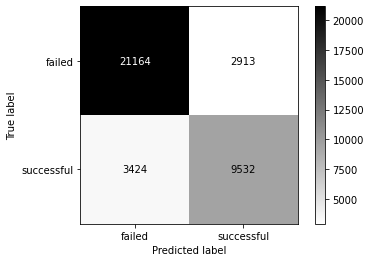

In [ ]:
# Plot confusion matrix
y_pred = model.predict([X_test_nn_structured, X_test_nn_text, X_test_lr], batch_size=512, verbose=0)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

###### b) Stacking Ensemble

In [ ]:
# Define the model
def create_model():
  # Inputs
  input_nn_structured = Input(shape=(233,))
  input_nn_text = Input(shape=(max_len,))
  input_lr = Input(shape=(75233,), sparse=True)

  # Text Branch RNN
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_nn_text)
  rnn = GRU(256, kernel_initializer=GlorotUniform(seed=seed_value), dropout=0.5)(embeddings)
  output_rnn = Dropout(rate=0.5, seed=seed_value)(rnn)

  # Merge RNN output to Structured Features of NN
  concat = Concatenate()([input_nn_structured, output_rnn])

  # Dense Classifier NN
  dense = Dense(500, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(concat)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(350, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(245, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  output_nn = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(dense)

  # LR
  output_lr = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(input_lr)

  # Stacking Ensemble
  output = Concatenate()([output_nn, output_lr])
  output = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(output)

  # Define model
  model = Model([input_nn_structured, input_nn_text, input_lr], output)
  return model

In [ ]:
# Compile the model
model = create_model()
model.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Show summary of the model
model.summary()

In [ ]:
# Train the model
model.fit([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, validation_data=([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test), batch_size=512, epochs=14, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=7, mode="max", restore_best_weights=True)])

In [ ]:
# Evaluate Generalization Performance
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.296,0.880,0.818,0.844,0.830,0.738,0.945
Test Set,0.363,0.831,0.753,0.770,0.761,0.632,0.909


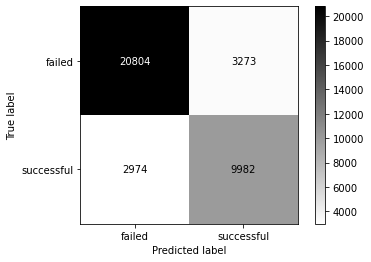

In [ ]:
# Plot confusion matrix
y_pred = model.predict([X_test_nn_structured, X_test_nn_text, X_test_lr], batch_size=512, verbose=0)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Combine CNN with LR:

###### a) Average Ensemble

In [ ]:
# Define the model
def create_model():
  # Inputs
  input_nn_structured = Input(shape=(233,))
  input_nn_text = Input(shape=(max_len,))
  input_lr = Input(shape=(75233,), sparse=True)

  # Text Branch
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_nn_text)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(embeddings)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D()(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Flatten()(cnn)
  cnn = Dense(490, activation='gelu', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  output_cnn = Dropout(rate=0.5, seed=seed_value)(cnn)

  # Structured Branch
  mlp = Dense(500, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(input_nn_structured)
  mlp = Dropout(rate=0.5, seed=seed_value)(mlp)
  mlp = Dense(350, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(mlp)
  mlp = Dropout(rate=0.5, seed=seed_value)(mlp)
  mlp = Dense(245, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(mlp)
  output_mlp = Dropout(rate=0.5, seed=seed_value)(mlp)

  # Concatenate Features
  concat = Concatenate()([output_mlp, output_cnn])

  # Dense Classifier
  dense = Dense(256, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(concat)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(64, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  output_nn = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(dense)

  # LogReg
  output_lr = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(input_lr)

  # Average Predictions
  output = Average()([output_nn, output_lr])


  # Define model
  model = Model([input_nn_structured, input_nn_text, input_lr], output)
  return model

In [ ]:
# Compile the model
model = create_model()
model.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Show summary of the model
model.summary()

In [ ]:
# Train the model
model.fit([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, validation_data=([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test), batch_size=512, epochs=24, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=7, mode="max", restore_best_weights=True)])

In [ ]:
# Evaluate Generalization Performance
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.292,0.866,0.822,0.787,0.804,0.703,0.944
Test Set,0.368,0.827,0.768,0.725,0.745,0.615,0.907


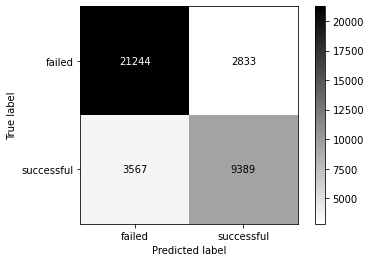

In [ ]:
# Plot confusion matrix
y_pred = model.predict([X_test_nn_structured, X_test_nn_text, X_test_lr], batch_size=512, verbose=0)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

###### b) Stacking Ensemble

In [ ]:
# Define the model
def create_model():
  # Inputs
  input_nn_structured = Input(shape=(233,))
  input_nn_text = Input(shape=(max_len,))
  input_lr = Input(shape=(75233,), sparse=True)

  # Text Branch
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_nn_text)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(embeddings)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D()(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Flatten()(cnn)
  cnn = Dense(490, activation='gelu', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  output_cnn = Dropout(rate=0.5, seed=seed_value)(cnn)

  # Structured Branch
  mlp = Dense(500, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(input_nn_structured)
  mlp = Dropout(rate=0.5, seed=seed_value)(mlp)
  mlp = Dense(350, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(mlp)
  mlp = Dropout(rate=0.5, seed=seed_value)(mlp)
  mlp = Dense(245, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(mlp)
  output_mlp = Dropout(rate=0.5, seed=seed_value)(mlp)

  # Concatenate Features
  concat = Concatenate()([output_mlp, output_cnn])

  # Dense Classifier
  dense = Dense(256, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(concat)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(64, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  output_nn = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(dense)

  # LogReg
  output_lr = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(input_lr)

  # Stacking Ensemble
  output = Concatenate()([output_nn, output_lr])
  output = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(output)


  # Define model
  model = Model([input_nn_structured, input_nn_text, input_lr], output)
  return model

In [ ]:
# Compile the model
model = create_model()
model.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Show summary of the model
model.summary()

In [ ]:
# Train the model
model.fit([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, validation_data=([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test), batch_size=512, epochs=18, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=7, mode="max", restore_best_weights=True)])

In [ ]:
# Evaluate Generalization Performance
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.274,0.891,0.844,0.843,0.843,0.759,0.952
Test Set,0.363,0.832,0.764,0.753,0.758,0.630,0.909


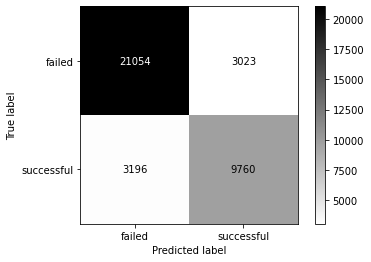

In [ ]:
# Plot confusion matrix
y_pred = model.predict([X_test_nn_structured, X_test_nn_text, X_test_lr], batch_size=512, verbose=0)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["failed", "successful"])
disp.plot(values_format="d", cmap="binary");

##### Result:

- RNN + LR (Average): 86.1% vs. 82.9%
- RNN + LR (Stacking): 88% vs. 83.1%
- CNN + LR (Average): 86.6% vs. 82.7%
- CNN + LR (Stacking): 89.1% vs. 83.2%
-> i.e. Stacking Ensemble was better

#### Test Models From Papers:

##### Arvind & Akilandeswari (2020):

###### Data Preparation:

In [ ]:
# Import Kickstarter Dataset
kickstarter_df = pd.read_csv("04_Final Datasets/Kickstarter_Structured_and_Text.csv", index_col=0)
print(kickstarter_df.shape)
print(len(kickstarter_df.index.unique()))
kickstarter_df.head(1)

(246891, 41)
246891


,campaign_successful,title,blurb,story,risks,reward_description,creator_bio,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category
22821161,0,sentio golf putters. feel is the difference,choose the feel you want with our patented flo...,sentio putters feature a unique floating face...,high tech process although we have made severa...,our eternal gratitude. every little bit helps ...,sentio golf is driven to produce the most adva...,50000.0,0,45,102,3,0,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design


In [ ]:
# Merge Text Attributes Together
kickstarter_df["text"] = kickstarter_df["title"] + " " + kickstarter_df["blurb"] + " " + kickstarter_df["story"] + " " + kickstarter_df["risks"] + " " + kickstarter_df["creator_bio"] + " " + kickstarter_df["reward_description"]
kickstarter_df.drop(columns=["title", "blurb", "story", "risks", "creator_bio", "reward_description"], inplace=True)
print(kickstarter_df.shape)
kickstarter_df.head(1)

(246891, 36)


,campaign_successful,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category,text
22821161,0,50000.0,0,45,102,3,0,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design,sentio golf putters. feel is the difference ch...


In [ ]:
# Remove stopwords and punctation from text
stopwords = set(list(ENGLISH_STOP_WORDS) + ["s"])
kickstarter_df["text"] = kickstarter_df.text.str.replace(r"\.", "")
kickstarter_df["text"] = kickstarter_df.text.progress_apply(lambda x: " ".join([token for token in x.split() if token not in stopwords]))

100%|██████████| 246891/246891 [00:45<00:00, 5438.14it/s]


In [ ]:
# Convert categorical features into dummy-variables
print("Before: {}".format(kickstarter_df.shape))
kickstarter_df["launch_quartal"] = kickstarter_df.launch_quartal.apply(str)
kickstarter_df = pd.get_dummies(kickstarter_df, prefix=["launch_quartal", "location", "category"], columns=["launch_quartal", "location", "category"], drop_first=False)
print("After: {}".format(kickstarter_df.shape))
kickstarter_df.head(1)

Before: (246891, 36)
After: (246891, 235)


,campaign_successful,goal,number_of_collaborators,funding_period,days_between_created_and_launched,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,text,launch_quartal_1,launch_quartal_2,launch_quartal_3,launch_quartal_4,location_Africa,location_Australia,location_Belgium,location_Canada,location_China,location_Denmark,location_France,location_Germany,location_Hong Kong,location_Ireland,location_Italy,location_Japan,location_Latin and South America,location_Mexico,location_Netherlands,location_New Zealand,location_No Location,location_Norway,location_Oceania and Antarctica,location_Rest of Asia,location_Rest of Europe,location_Singapore,location_Spain,location_Sweden,location_Switzerland,location_United Kingdom,location_United States,category_Art_Ceramics,category_Art_Conceptual Art,category_Art_Digital Art,category_Art_Illustration,category_Art_Installations,category_Art_Mixed Media,category_Art_No Subcategory,category_Art_Painting,category_Art_Performance Art,category_Art_Public Art,category_Art_Sculpture,category_Art_Social Practice,category_Art_Textiles,category_Art_Video Art,category_Comics_Anthologies,category_Comics_Comic Books,category_Comics_Events,category_Comics_Graphic Novels,category_Comics_No Subcategory,category_Comics_Webcomics,category_Crafts_Candles,category_Crafts_Crochet,category_Crafts_DIY,category_Crafts_Embroidery,category_Crafts_Glass,category_Crafts_Knitting,category_Crafts_No Subcategory,category_Crafts_Pottery,category_Crafts_Printing,category_Crafts_Quilts,category_Crafts_Stationery,category_Crafts_Taxidermy,category_Crafts_Weaving,category_Crafts_Woodworking,category_Dance_No Subcategory,category_Dance_Performances,category_Dance_Residencies,category_Dance_Spaces,category_Dance_Workshops,category_Design_Architecture,category_Design_Civic Design,category_Design_Graphic Design,category_Design_Interactive Design,category_Design_No Subcategory,category_Design_Product Design,category_Design_Toys,category_Design_Typography,category_Fashion_Accessories,category_Fashion_Apparel,category_Fashion_Childrenswear,category_Fashion_Couture,category_Fashion_Footwear,category_Fashion_Jewelry,category_Fashion_No Subcategory,category_Fashion_Pet Fashion,category_Fashion_Ready-to-wear,category_Film & Video_Action,category_Film & Video_Animation,category_Film & Video_Comedy,category_Film & Video_Documentary,category_Film & Video_Drama,category_Film & Video_Experimental,category_Film & Video_Family,category_Film & Video_Fantasy,category_Film & Video_Festivals,category_Film & Video_Horror,category_Film & Video_Movie Theaters,category_Film & Video_Music Videos,category_Film & Video_Narrative Film,category_Film & Video_No Subcategory,category_Film & Video_Romance,category_Film & Video_Science Fiction,category_Film & Video_Shorts,category_Film & Video_Television,category_Film & Video_Thrillers,category_Film & Video_Webseries,category_Food_Bacon,category_Food_Community Gardens,category_Food_Cookbooks,category_Food_Drinks,category_Food_Events,category_Food_Farmer's Markets,category_Food_Farms,category_Food_Food Trucks,category_Food_No Subcategory,category_Food_Restaurants,category_Food_Small Batch,category_Food_Spaces,category_Food_Vegan,category_Games_Gaming Hardware,category_Games_Live Games,category_Games_Mobile Games,category_Games_No Subcategory,category_Games_Playing Cards,category_Games_Puzzles,category_Games_Tabletop Games,category_Games_Video Games,category_Journalism_Audio,category_Journalism_No Subcategory,cate

In [ ]:
# Convert dataset and target variable to Numpy Arrays
y = kickstarter_df["campaign_successful"].to_numpy()
kickstarter_df.drop(columns=["campaign_successful"], inplace=True)
X = kickstarter_df.to_numpy()

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(246891,)
<class 'numpy.ndarray'>
(246891, 234)


In [ ]:
# Retrieve column names which will be used for later pre-processing
feature_names = kickstarter_df.columns.values
text_feature_names = "text"
numeric_feature_names = [x for x in feature_names if (x != text_feature_names)]
text_features = kickstarter_df.columns.get_loc(text_feature_names)
numeric_features = [kickstarter_df.columns.get_loc(x) for x in numeric_feature_names]
print(len(numeric_feature_names)+1)

234


In [ ]:
# Split dataset into training, subtraining, validation, and test set
train_size = round(kickstarter_df.shape[0]*0.7*1)
val_size = round(kickstarter_df.shape[0]*0.15*1)
test_size = round(kickstarter_df.shape[0]*1) - val_size - train_size

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(train_size+val_size), test_size=test_size, shuffle=True, stratify=y, random_state=seed_value)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, train_size=train_size, test_size=val_size, shuffle=True, stratify=y_train, random_state=seed_value)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_subtrain: {}".format(X_subtrain.shape))
print("Shape of y_subtrain: {}".format(y_subtrain.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of y_val: {}".format(y_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (209858, 234)
Shape of y_train: (209858,)
Shape of X_subtrain: (172824, 234)
Shape of y_subtrain: (172824,)
Shape of X_val: (37034, 234)
Shape of y_val: (37034,)
Shape of X_test: (37033, 234)
Shape of y_test: (37033,)


In [ ]:
# Pre-process features
preprocessing = ColumnTransformer(
    [
      ("numeric", MinMaxScaler(feature_range=(-1,1)), numeric_features)
    ],
    remainder="passthrough", verbose=True, n_jobs=-1).fit(X_train)

X_train = preprocessing.transform(X_train)
X_test = preprocessing.transform(X_test)

In [ ]:
# Split dataset into structured and text features
X_train_structured = X_train[:,0:233].astype("float32")
X_train_text = X_train[:,233]
X_test_structured = X_test[:,0:233].astype("float32")
X_test_text = X_test[:,233]

print("Shape of X_train_structured: {}".format(X_train_structured.shape))
print("Shape of X_train_text: {}".format(X_train_text.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test_structured: {}".format(X_test_structured.shape))
print("Shape of X_test_text: {}".format(X_test_text.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train_structured: (209858, 233)
Shape of X_train_text: (209858,)
Shape of y_train: (209858,)
Shape of X_test_structured: (37033, 233)
Shape of X_test_text: (37033,)
Shape of y_test: (37033,)


In [ ]:
# Define parameters for text processing 
max_features = 32000
max_len = 240
embedding_dim = 20

In [ ]:
# Convert Texts Into Integer Sequences (Tokenization)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train_text)
X_train_text = tokenizer.texts_to_sequences(X_train_text)
X_test_text = tokenizer.texts_to_sequences(X_test_text)
word_index = tokenizer.word_index
print("Included Token: {}".format(tokenizer.num_words))

Included Token: 32000


In [ ]:
# Pad and Truncate sequences
X_train_text = pad_sequences(X_train_text, maxlen=max_len, padding="pre", truncating="post")
X_test_text = pad_sequences(X_test_text, maxlen=max_len, padding="pre", truncating="post")

print("Shape of X_train_text: {}".format(X_train_text.shape))
print("Shape of X_test_text: {}".format(X_test_text.shape))

Shape of X_train_text: (209858, 240)
Shape of X_test_text: (37033, 240)


###### Model Building:

In [ ]:
def create_model():
  # Inputs
  structured_input = Input(shape=(233,))
  text_input = Input(shape=(240,))

  # Text Branch (CNN)
  embeddings = Embedding(max_features, 360, input_length=max_len, trainable=True)(text_input)
  cnn1 = Conv1D(128, 3, activation="relu")(embeddings)
  cnn2 = Conv1D(128, 4, activation="relu")(embeddings)
  cnn3 = Conv1D(128, 5, activation="relu")(embeddings)
  pool1 = GlobalAvgPool1D()(cnn1)
  pool2 = GlobalAvgPool1D()(cnn2)
  pool3 = GlobalAvgPool1D()(cnn3)
  concat = Concatenate()([pool1, pool2, pool3])
  output_cnn = Dense(1, activation="sigmoid")(concat)

  # Structured Branch (MLP)
  mlp = Dense(60, activation="relu")(structured_input)
  mlp = Dense(30, activation="relu")(mlp)
  output_mlp = Dense(1, activation="sigmoid")(mlp)

  # Stacking Ensemble
  output = Concatenate()([output_cnn, output_mlp])
  output = Dense(1, activation="sigmoid")(output)

  # Define Model
  model = Model([structured_input, text_input], output)
  return model

In [ ]:
# Compile the model
with strategy.scope():
  model = create_model()
  model.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

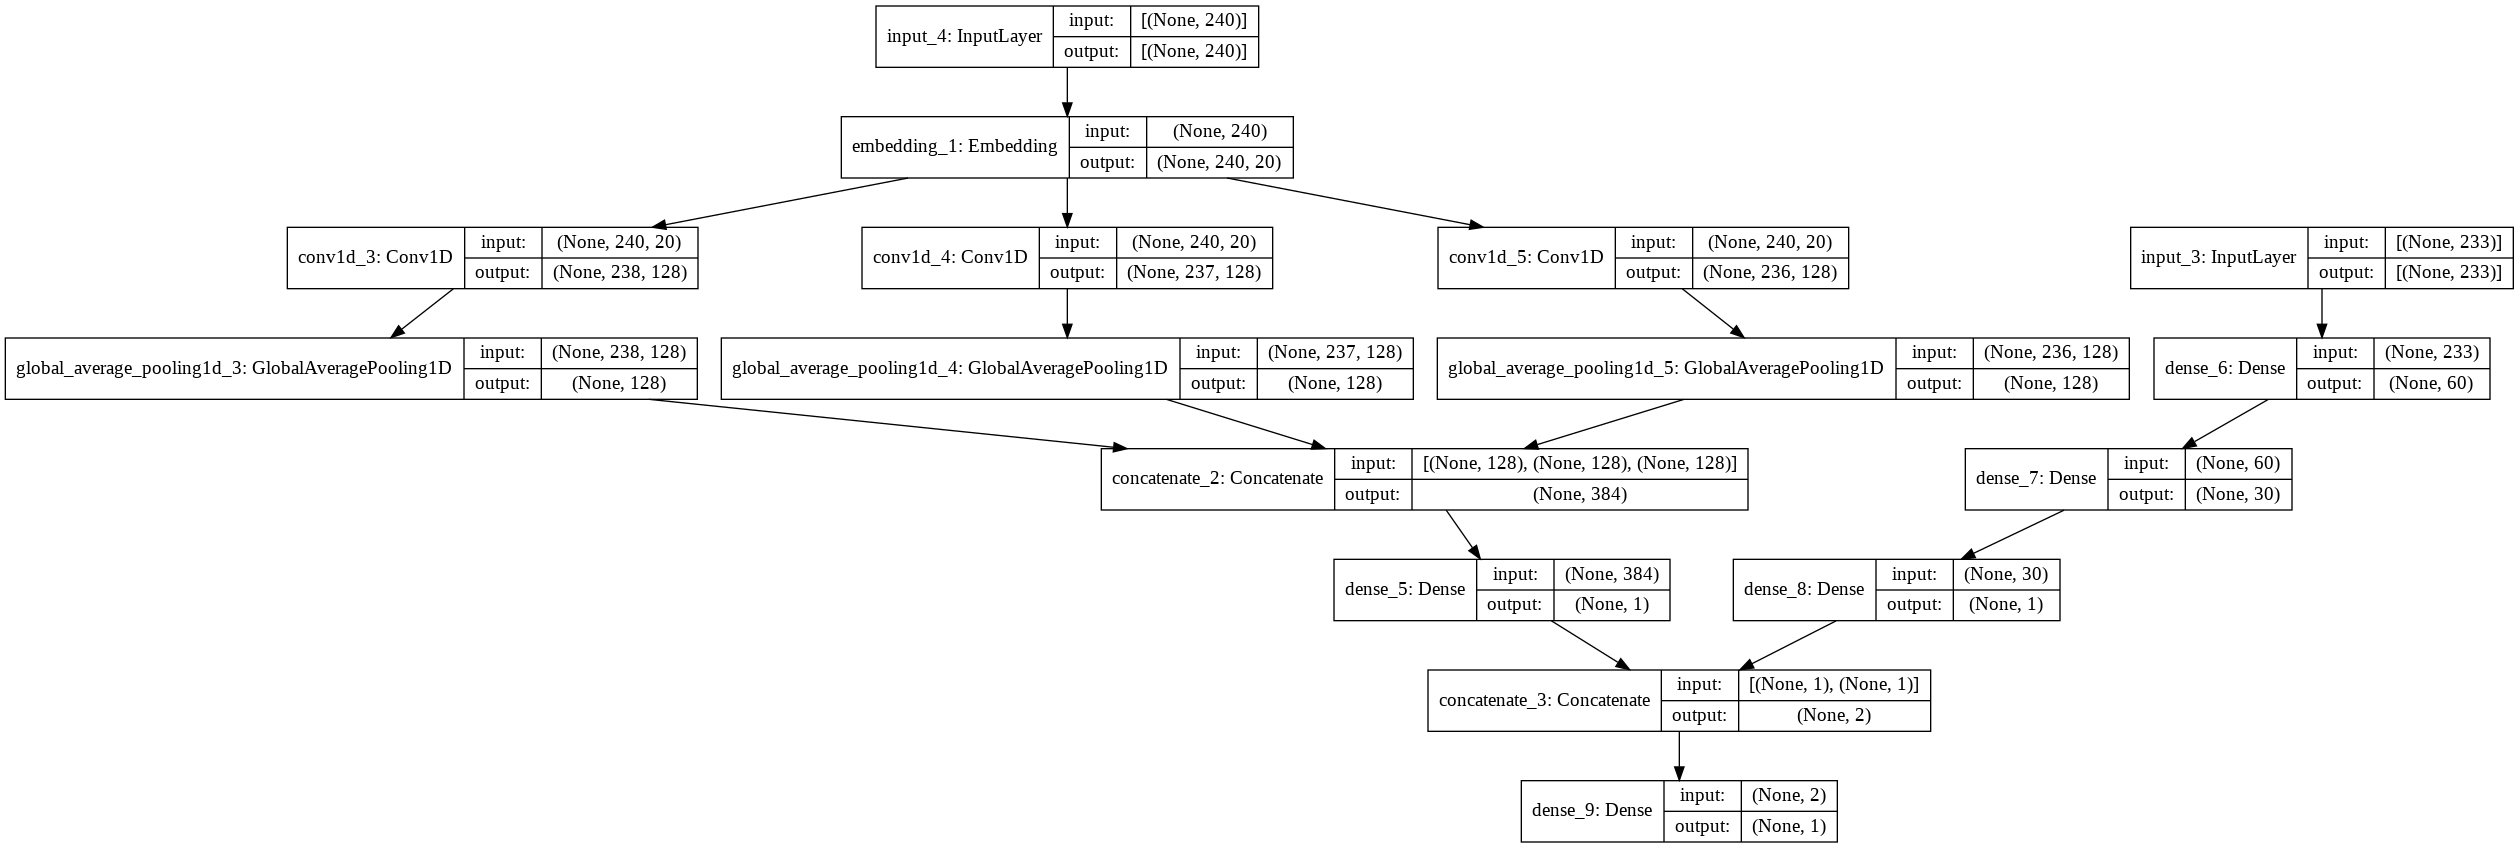

In [ ]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Show summary of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 240)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 240, 360)     11520000    input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 238, 128)     138368      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 237, 128)     184448      embedding_3[0][0]                
____________________________________________________________________________________________

In [ ]:
# Train the model
model.fit([X_train_structured, X_train_text], y_train, validation_data=([X_test_structured, X_test_text], y_test), batch_size=360, epochs=100, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=7, mode="max", restore_best_weights=True)])

In [ ]:
# Evaluate Generalization Performance
training_results = model.evaluate([X_train_structured, X_train_text], y_train, batch_size=360, verbose=0)
test_results = model.evaluate([X_test_structured, X_test_text], y_test, batch_size=360, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.427,0.824,0.765,0.718,0.734,0.608,0.877
Test Set,0.491,0.767,0.677,0.638,0.649,0.480,0.822


##### Cheng et al. (2019):

###### Data Preparation:

In [ ]:
# Import Glove Embeddings
import gensim.downloader as api
glove = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# Import Kickstarter Dataset
kickstarter_df = pd.read_csv("04_Final Datasets/Kickstarter_Structured_and_Text.csv", index_col=0)
print(kickstarter_df.shape)
print(len(kickstarter_df.index.unique()))
kickstarter_df.head(1)

(246891, 41)
246891


,campaign_successful,title,blurb,story,risks,reward_description,creator_bio,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category
22821161,0,sentio golf putters. feel is the difference,choose the feel you want with our patented flo...,sentio putters feature a unique floating face...,high tech process although we have made severa...,our eternal gratitude. every little bit helps ...,sentio golf is driven to produce the most adva...,50000.0,0,45,102,3,0,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design


In [ ]:
# Merge Text Attributes Together
kickstarter_df["text"] = kickstarter_df["title"] + " " + kickstarter_df["blurb"] + " " + kickstarter_df["story"] + " " + kickstarter_df["risks"] + " " + kickstarter_df["creator_bio"] + " " + kickstarter_df["reward_description"]
kickstarter_df.drop(columns=["title", "blurb", "story", "risks", "creator_bio", "reward_description"], inplace=True)
print(kickstarter_df.shape)
kickstarter_df.head(1)

(246891, 36)


,campaign_successful,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category,text
22821161,0,50000.0,0,45,102,3,0,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design,sentio golf putters. feel is the difference ch...


In [ ]:
# Remove stopwords and punctation from text
stopwords = set(list(ENGLISH_STOP_WORDS) + ["s"])
kickstarter_df["text"] = kickstarter_df.text.str.replace(r"\.", "")
kickstarter_df["text"] = kickstarter_df.text.progress_apply(lambda x: " ".join([token for token in x.split() if token not in stopwords]))

100%|██████████| 246891/246891 [00:52<00:00, 4732.73it/s]


In [ ]:
# Convert categorical features into dummy-variables
print("Before: {}".format(kickstarter_df.shape))
kickstarter_df["launch_quartal"] = kickstarter_df.launch_quartal.apply(str)
kickstarter_df = pd.get_dummies(kickstarter_df, prefix=["launch_quartal", "location", "category"], columns=["launch_quartal", "location", "category"], drop_first=False)
print("After: {}".format(kickstarter_df.shape))
kickstarter_df.head(1)

Before: (246891, 36)
After: (246891, 235)


,campaign_successful,goal,number_of_collaborators,funding_period,days_between_created_and_launched,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,text,launch_quartal_1,launch_quartal_2,launch_quartal_3,launch_quartal_4,location_Africa,location_Australia,location_Belgium,location_Canada,location_China,location_Denmark,location_France,location_Germany,location_Hong Kong,location_Ireland,location_Italy,location_Japan,location_Latin and South America,location_Mexico,location_Netherlands,location_New Zealand,location_No Location,location_Norway,location_Oceania and Antarctica,location_Rest of Asia,location_Rest of Europe,location_Singapore,location_Spain,location_Sweden,location_Switzerland,location_United Kingdom,location_United States,category_Art_Ceramics,category_Art_Conceptual Art,category_Art_Digital Art,category_Art_Illustration,category_Art_Installations,category_Art_Mixed Media,category_Art_No Subcategory,category_Art_Painting,category_Art_Performance Art,category_Art_Public Art,category_Art_Sculpture,category_Art_Social Practice,category_Art_Textiles,category_Art_Video Art,category_Comics_Anthologies,category_Comics_Comic Books,category_Comics_Events,category_Comics_Graphic Novels,category_Comics_No Subcategory,category_Comics_Webcomics,category_Crafts_Candles,category_Crafts_Crochet,category_Crafts_DIY,category_Crafts_Embroidery,category_Crafts_Glass,category_Crafts_Knitting,category_Crafts_No Subcategory,category_Crafts_Pottery,category_Crafts_Printing,category_Crafts_Quilts,category_Crafts_Stationery,category_Crafts_Taxidermy,category_Crafts_Weaving,category_Crafts_Woodworking,category_Dance_No Subcategory,category_Dance_Performances,category_Dance_Residencies,category_Dance_Spaces,category_Dance_Workshops,category_Design_Architecture,category_Design_Civic Design,category_Design_Graphic Design,category_Design_Interactive Design,category_Design_No Subcategory,category_Design_Product Design,category_Design_Toys,category_Design_Typography,category_Fashion_Accessories,category_Fashion_Apparel,category_Fashion_Childrenswear,category_Fashion_Couture,category_Fashion_Footwear,category_Fashion_Jewelry,category_Fashion_No Subcategory,category_Fashion_Pet Fashion,category_Fashion_Ready-to-wear,category_Film & Video_Action,category_Film & Video_Animation,category_Film & Video_Comedy,category_Film & Video_Documentary,category_Film & Video_Drama,category_Film & Video_Experimental,category_Film & Video_Family,category_Film & Video_Fantasy,category_Film & Video_Festivals,category_Film & Video_Horror,category_Film & Video_Movie Theaters,category_Film & Video_Music Videos,category_Film & Video_Narrative Film,category_Film & Video_No Subcategory,category_Film & Video_Romance,category_Film & Video_Science Fiction,category_Film & Video_Shorts,category_Film & Video_Television,category_Film & Video_Thrillers,category_Film & Video_Webseries,category_Food_Bacon,category_Food_Community Gardens,category_Food_Cookbooks,category_Food_Drinks,category_Food_Events,category_Food_Farmer's Markets,category_Food_Farms,category_Food_Food Trucks,category_Food_No Subcategory,category_Food_Restaurants,category_Food_Small Batch,category_Food_Spaces,category_Food_Vegan,category_Games_Gaming Hardware,category_Games_Live Games,category_Games_Mobile Games,category_Games_No Subcategory,category_Games_Playing Cards,category_Games_Puzzles,category_Games_Tabletop Games,category_Games_Video Games,category_Journalism_Audio,category_Journalism_No Subcategory,cate

In [ ]:
# Convert dataset and target variable to Numpy Arrays
y = kickstarter_df["campaign_successful"].to_numpy()
kickstarter_df.drop(columns=["campaign_successful"], inplace=True)
X = kickstarter_df.to_numpy()

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(246891,)
<class 'numpy.ndarray'>
(246891, 234)


In [ ]:
# Retrieve column names which will be used for later pre-processing and evaluation
feature_names = kickstarter_df.columns.values
text_feature_names = "text"
numeric_feature_names = [x for x in feature_names if (x != text_feature_names)]
text_features = kickstarter_df.columns.get_loc(text_feature_names)
numeric_features = [kickstarter_df.columns.get_loc(x) for x in numeric_feature_names]
print(len(numeric_feature_names)+1)

234


In [ ]:
# Split dataset into training, subtraining, validation, and test set
train_size = round(kickstarter_df.shape[0]*0.7*1)
val_size = round(kickstarter_df.shape[0]*0.15*1)
test_size = round(kickstarter_df.shape[0]*1) - val_size - train_size

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(train_size+val_size), test_size=test_size, shuffle=True, stratify=y, random_state=seed_value)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, train_size=train_size, test_size=val_size, shuffle=True, stratify=y_train, random_state=seed_value)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_subtrain: {}".format(X_subtrain.shape))
print("Shape of y_subtrain: {}".format(y_subtrain.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of y_val: {}".format(y_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (209858, 234)
Shape of y_train: (209858,)
Shape of X_subtrain: (172824, 234)
Shape of y_subtrain: (172824,)
Shape of X_val: (37034, 234)
Shape of y_val: (37034,)
Shape of X_test: (37033, 234)
Shape of y_test: (37033,)


In [ ]:
# Pre-process features
preprocessing = ColumnTransformer(
    [
      ("numeric", StandardScaler(), numeric_features)
    ],
    remainder="passthrough", verbose=True, n_jobs=-1).fit(X_train)

X_train = preprocessing.transform(X_train)
X_test = preprocessing.transform(X_test)

In [ ]:
# Split dataset into structured and text features
X_train_structured = X_train[:,0:233].astype("float32")
X_train_text = X_train[:,233]
X_test_structured = X_test[:,0:233].astype("float32")
X_test_text = X_test[:,233]

print("Shape of X_train_structured: {}".format(X_train_structured.shape))
print("Shape of X_train_text: {}".format(X_train_text.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test_structured: {}".format(X_test_structured.shape))
print("Shape of X_test_text: {}".format(X_test_text.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train_structured: (209858, 233)
Shape of X_train_text: (209858,)
Shape of y_train: (209858,)
Shape of X_test_structured: (37033, 233)
Shape of X_test_text: (37033,)
Shape of y_test: (37033,)


In [ ]:
# Define parameters for text processing 
max_features = 714542
max_len = 725
embedding_dim = 300

In [ ]:
# Convert Texts Into Integer Sequences (Tokenization)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text)
X_train_text = tokenizer.texts_to_sequences(X_train_text)
X_test_text = tokenizer.texts_to_sequences(X_test_text)
word_index = tokenizer.word_index
print("Included Token: {}".format(len(word_index)))

Included Token: 714541


In [ ]:
# Pad and Truncate sequences
X_train_text = pad_sequences(X_train_text, maxlen=max_len, padding="pre", truncating="post")
X_test_text = pad_sequences(X_test_text, maxlen=max_len, padding="pre", truncating="post")

print("Shape of X_train_text: {}".format(X_train_text.shape))
print("Shape of X_test_text: {}".format(X_test_text.shape))

Shape of X_train_text: (209858, 725)
Shape of X_test_text: (37033, 725)


In [ ]:
# Prepare the Embedding Matrix
print('Preparing Embedding Matrix...')
words_not_found = []
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
      if word in glove.vocab:
        embedding_matrix[i] = glove.get_vector(word)
      else:
        words_not_found.append(word)
print('Shape of Embedding Matrix: {}'.format(embedding_matrix.shape))
print('Number of Null Word Embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Preparing Embedding Matrix...
Shape of Embedding Matrix: (714542, 300)
Number of Null Word Embeddings: 518754


###### Model Building:

In [ ]:
def create_model():
  # Inputs
  structured_input = Input(shape=(233,))
  text_input = Input(shape=(725,))

  # Text Branch (CNN)
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(text_input)
  cnn = Conv1D(96, 5, activation="relu")(embeddings)
  cnn = MaxPool1D()(cnn)
  cnn = Dropout(rate=0.3, seed=seed_value)(cnn)
  cnn = Conv1D(128, 5, activation="relu")(cnn)
  cnn = MaxPool1D()(cnn)
  cnn = Dropout(rate=0.3, seed=seed_value)(cnn)
  cnn = Conv1D(256, 5, activation="relu")(cnn)
  cnn = MaxPool1D()(cnn)
  cnn = Dropout(rate=0.3, seed=seed_value)(cnn)
  output_cnn = Flatten()(cnn)

  # Structured Branch (MLP)
  mlp = Dense(256, activation="relu")(structured_input)
  output_mlp = Dropout(rate=0.3, seed=seed_value)(mlp)

  # Dense Classifier
  output = Concatenate()([output_mlp, output_cnn])
  output = Dense(1536, activation="relu")(output)
  output = Dropout(rate=0.9, seed=seed_value)(output)
  output = Dense(1, activation="sigmoid")(output)

  # Define Model
  model = Model([structured_input, text_input], output)
  return model

In [ ]:
# Compile the model
with strategy.scope():
  model = create_model()
  model.compile(optimizer=RMSprop(lr=1e-5), loss="binary_crossentropy", steps_per_execution=200, metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

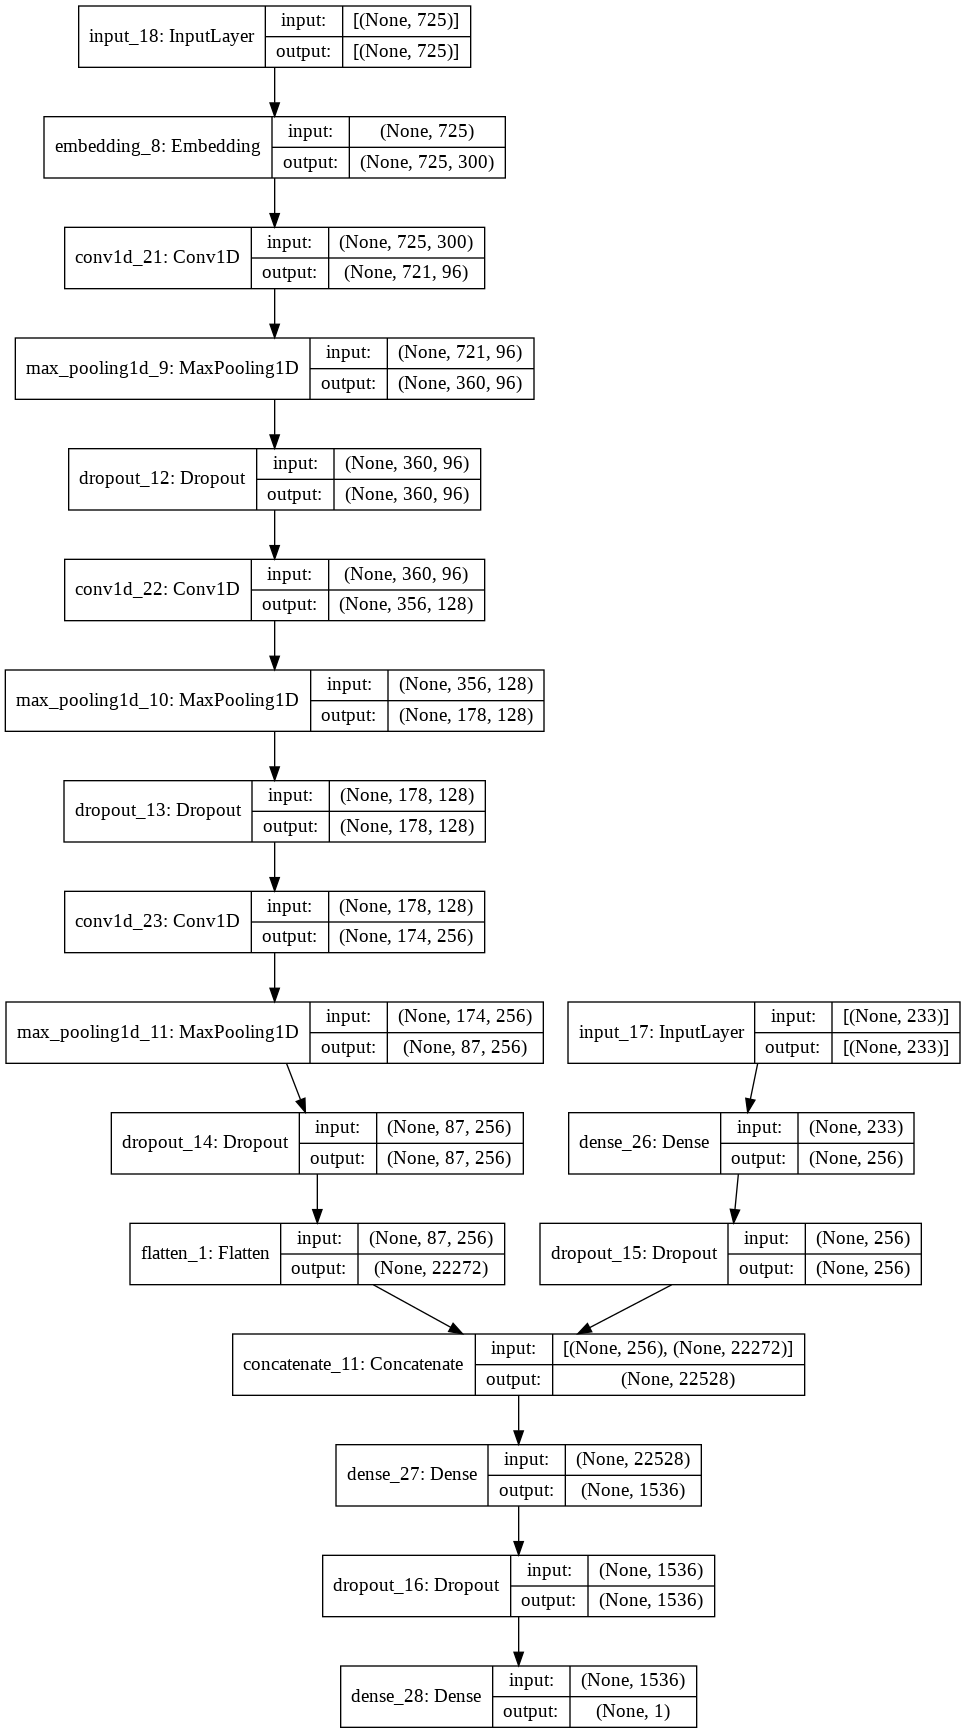

In [ ]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Show summary of the model
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 725)]        0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 725, 300)     214362600   input_18[0][0]                   
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 721, 96)      144096      embedding_8[0][0]                
__________________________________________________________________________________________________
max_pooling1d_9 (MaxPooling1D)  (None, 360, 96)      0           conv1d_21[0][0]                  
____________________________________________________________________________________________

In [ ]:
# Train the model
model.fit([X_train_structured, X_train_text], y_train, validation_data=([X_test_structured, X_test_text], y_test), batch_size=128, epochs=100, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=7, mode="max", restore_best_weights=True)])

In [ ]:
# Evaluate Generalization Performance
training_results = model.evaluate([X_train_structured, X_train_text], y_train, batch_size=128, verbose=0)
test_results = model.evaluate([X_test_structured, X_test_text], y_test, batch_size=128, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.512,0.765,0.634,0.775,0.679,0.512,0.846
Test Set,0.516,0.758,0.627,0.763,0.668,0.497,0.838


#### Ablation Analysis (Information Leak):

##### Data Preparation:

In [ ]:
# Import Word Embeddings
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
# Import Kickstarter Dataset
kickstarter_df = pd.read_csv("04_Final Datasets/Kickstarter_Structured_and_Text.csv", index_col=0)
print(kickstarter_df.shape)
print(len(kickstarter_df.index.unique()))
kickstarter_df.head(1)

(246891, 41)
246891


,campaign_successful,title,blurb,story,risks,reward_description,creator_bio,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category
22821161,0,sentio golf putters. feel is the difference,choose the feel you want with our patented flo...,sentio putters feature a unique floating face...,high tech process although we have made severa...,our eternal gratitude. every little bit helps ...,sentio golf is driven to produce the most adva...,50000.0,0,45,102,3,0,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design


In [ ]:
# Import Data Leakage Attributes
leak_df = pd.read_csv("04_Final Datasets/Kickstarter_Structured_Information_Leak.csv", index_col=0)
print(leak_df.shape)
print(len(leak_df.index.unique()))
leak_df.head(1)

(246891, 6)
246891


,pledged,number_of_backers,number_of_comments,number_of_updates,launch_year,spotlight
22821161,9707.0,41,0,4,2015,0


In [ ]:
# Add leaking attributes to Kickstarter dataset
print("Before: {}".format(kickstarter_df.shape))
kickstarter_df = kickstarter_df.join(leak_df, how="left")
print("After: {}".format(kickstarter_df.shape))
print(len(kickstarter_df.index.unique()))
kickstarter_df.head(1)

Before: (246891, 41)
After: (246891, 47)
246891


,campaign_successful,title,blurb,story,risks,reward_description,creator_bio,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,staff_pick,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category,pledged,number_of_backers,number_of_comments,number_of_updates,launch_year,spotlight
22821161,0,sentio golf putters. feel is the difference,choose the feel you want with our patented flo...,sentio putters feature a unique floating face...,high tech process although we have made severa...,our eternal gratitude. every little bit helps ...,sentio golf is driven to produce the most adva...,50000.0,0,45,102,3,0,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design,9707.0,41,0,4,2015,0


In [ ]:
# Gradually remove leaking attributes
print("Before: {}".format(kickstarter_df.shape))
kickstarter_df.drop(columns=["spotlight", "pledged", "number_of_backers", "number_of_comments", "number_of_updates", "launch_year", "staff_pick"], inplace=True)
print("After: {}".format(kickstarter_df.shape))

Before: (246891, 47)
After: (246891, 40)


In [ ]:
# Merge Text Attributes Together
kickstarter_df["text"] = kickstarter_df["title"] + " " + kickstarter_df["blurb"] + " " + kickstarter_df["story"] + " " + kickstarter_df["risks"] + " " + kickstarter_df["creator_bio"] + " " + kickstarter_df["reward_description"]
kickstarter_df.drop(columns=["title", "blurb", "story", "risks", "creator_bio", "reward_description"], inplace=True)
print(kickstarter_df.shape)
kickstarter_df.head(1)

(246891, 35)


,campaign_successful,goal,number_of_collaborators,funding_period,days_between_created_and_launched,launch_quartal,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,location,category,text
22821161,0,50000.0,0,45,102,3,1,0,13,0,0,0,1378,2,1,0,1,1,0,1,0,0,0,0,8,36.75,5.0,1417.0,0,1,1,5.5,United States,Design_Product Design,sentio golf putters. feel is the difference ch...


In [ ]:
# Remove stopwords and punctation from text
stopwords = set(list(ENGLISH_STOP_WORDS) + ["s"])
kickstarter_df["text"] = kickstarter_df.text.str.replace(r"\.", "")
kickstarter_df["text"] = kickstarter_df.text.progress_apply(lambda x: " ".join([token for token in x.split() if token not in stopwords]))

100%|██████████| 246891/246891 [00:43<00:00, 5644.11it/s]


In [ ]:
# Convert categorical features into dummy-variables
print("Before: {}".format(kickstarter_df.shape))
#kickstarter_df["launch_year"] = kickstarter_df.launch_year.apply(str)
kickstarter_df["launch_quartal"] = kickstarter_df.launch_quartal.apply(str)
kickstarter_df = pd.get_dummies(kickstarter_df, prefix=["launch_quartal", "location", "category"], columns=["launch_quartal", "location", "category"], drop_first=False)
print("After: {}".format(kickstarter_df.shape))
kickstarter_df.head(1)

Before: (246891, 35)
After: (246891, 234)


,campaign_successful,goal,number_of_collaborators,funding_period,days_between_created_and_launched,campaign_has_demo_video,campaign_has_environmental_commitments,number_of_images,number_of_videos,number_of_audios,number_of_interactives,number_of_words,number_of_links,creator_verified_identity,creator_fb_auth,creator_has_image,creator_allows_follows,number_of_creator_backings,number_of_creator_projects,facebook_linked,twitter_linked,instagram_linked,linkedin_linked,number_of_rewards,number_of_words_per_reward,lowest_pledge_level,highest_pledge_level,has_limited_rewards,has_shipped_rewards,has_restricted_shipping_rewards,avg_months_until_reward,text,launch_quartal_1,launch_quartal_2,launch_quartal_3,launch_quartal_4,location_Africa,location_Australia,location_Belgium,location_Canada,location_China,location_Denmark,location_France,location_Germany,location_Hong Kong,location_Ireland,location_Italy,location_Japan,location_Latin and South America,location_Mexico,location_Netherlands,location_New Zealand,location_No Location,location_Norway,location_Oceania and Antarctica,location_Rest of Asia,location_Rest of Europe,location_Singapore,location_Spain,location_Sweden,location_Switzerland,location_United Kingdom,location_United States,category_Art_Ceramics,category_Art_Conceptual Art,category_Art_Digital Art,category_Art_Illustration,category_Art_Installations,category_Art_Mixed Media,category_Art_No Subcategory,category_Art_Painting,category_Art_Performance Art,category_Art_Public Art,category_Art_Sculpture,category_Art_Social Practice,category_Art_Textiles,category_Art_Video Art,category_Comics_Anthologies,category_Comics_Comic Books,category_Comics_Events,category_Comics_Graphic Novels,category_Comics_No Subcategory,category_Comics_Webcomics,category_Crafts_Candles,category_Crafts_Crochet,category_Crafts_DIY,category_Crafts_Embroidery,category_Crafts_Glass,category_Crafts_Knitting,category_Crafts_No Subcategory,category_Crafts_Pottery,category_Crafts_Printing,category_Crafts_Quilts,category_Crafts_Stationery,category_Crafts_Taxidermy,category_Crafts_Weaving,category_Crafts_Woodworking,category_Dance_No Subcategory,category_Dance_Performances,category_Dance_Residencies,category_Dance_Spaces,category_Dance_Workshops,category_Design_Architecture,category_Design_Civic Design,category_Design_Graphic Design,category_Design_Interactive Design,category_Design_No Subcategory,category_Design_Product Design,category_Design_Toys,category_Design_Typography,category_Fashion_Accessories,category_Fashion_Apparel,category_Fashion_Childrenswear,category_Fashion_Couture,category_Fashion_Footwear,category_Fashion_Jewelry,category_Fashion_No Subcategory,category_Fashion_Pet Fashion,category_Fashion_Ready-to-wear,category_Film & Video_Action,category_Film & Video_Animation,category_Film & Video_Comedy,category_Film & Video_Documentary,category_Film & Video_Drama,category_Film & Video_Experimental,category_Film & Video_Family,category_Film & Video_Fantasy,category_Film & Video_Festivals,category_Film & Video_Horror,category_Film & Video_Movie Theaters,category_Film & Video_Music Videos,category_Film & Video_Narrative Film,category_Film & Video_No Subcategory,category_Film & Video_Romance,category_Film & Video_Science Fiction,category_Film & Video_Shorts,category_Film & Video_Television,category_Film & Video_Thrillers,category_Film & Video_Webseries,category_Food_Bacon,category_Food_Community Gardens,category_Food_Cookbooks,category_Food_Drinks,category_Food_Events,category_Food_Farmer's Markets,category_Food_Farms,category_Food_Food Trucks,category_Food_No Subcategory,category_Food_Restaurants,category_Food_Small Batch,category_Food_Spaces,category_Food_Vegan,category_Games_Gaming Hardware,category_Games_Live Games,category_Games_Mobile Games,category_Games_No Subcategory,category_Games_Playing Cards,category_Games_Puzzles,category_Games_Tabletop Games,category_Games_Video Games,category_Journalism_Audio,category_Journalism_No Subcategory,category_Journa

In [ ]:
# Convert dataset and target variable to Numpy Arrays
y = kickstarter_df["campaign_successful"].to_numpy()
kickstarter_df.drop(columns=["campaign_successful"], inplace=True)
X = kickstarter_df.to_numpy()

print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(246891,)
<class 'numpy.ndarray'>
(246891, 233)


In [ ]:
# Retrieve column names which will be used for later pre-processing and evaluation
feature_names = kickstarter_df.columns.values
text_feature_names = "text"
numeric_feature_names = ["goal", "number_of_collaborators", "funding_period", "days_between_created_and_launched", "number_of_images", "number_of_videos", "number_of_audios", "number_of_interactives", "number_of_words", "number_of_links", "number_of_creator_backings", "number_of_creator_projects", "number_of_rewards", "number_of_words_per_reward", "lowest_pledge_level", "highest_pledge_level", "avg_months_until_reward"]
binary_feature_names = [x for x in feature_names if (x not in numeric_feature_names) & (x != text_feature_names)]
text_features = kickstarter_df.columns.get_loc(text_feature_names)
numeric_features = [kickstarter_df.columns.get_loc(x) for x in numeric_feature_names]
binary_features = [kickstarter_df.columns.get_loc(x) for x in binary_feature_names]
print(len(numeric_feature_names)+len(binary_feature_names) + 1)

233


In [ ]:
# Split dataset into training, subtraining, validation, and test set
train_size = round(kickstarter_df.shape[0]*0.7*1)
val_size = round(kickstarter_df.shape[0]*0.15*1)
test_size = round(kickstarter_df.shape[0]*1) - val_size - train_size

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(train_size+val_size), test_size=test_size, shuffle=True, stratify=y, random_state=seed_value)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, train_size=train_size, test_size=val_size, shuffle=True, stratify=y_train, random_state=seed_value)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_subtrain: {}".format(X_subtrain.shape))
print("Shape of y_subtrain: {}".format(y_subtrain.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of y_val: {}".format(y_val.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (209858, 233)
Shape of y_train: (209858,)
Shape of X_subtrain: (172824, 233)
Shape of y_subtrain: (172824,)
Shape of X_val: (37034, 233)
Shape of y_val: (37034,)
Shape of X_test: (37033, 233)
Shape of y_test: (37033,)


In [ ]:
# Split dataset into LR and NN related features
X_train_lr = X_train
X_train_nn = X_train
X_test_lr = X_test
X_test_nn = X_test

In [ ]:
# Create a dummy transformer that simply returns the original column (used for binary features)
class NoTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, np.ndarray)
        return X

In [ ]:
# Pre-process NN-related features
preprocessing = ColumnTransformer(
    [
      ("numeric", Pipeline([
                            ("powertransform", PowerTransformer(method="yeo-johnson", standardize=True)),
                            ("pca", PCA())
                          ]), numeric_features),
      ("binary", NoTransformer(), binary_features)
    ],
    remainder="passthrough", verbose=True, n_jobs=-1).fit(X_train_nn)

X_train_nn = preprocessing.transform(X_train_nn)
X_test_nn = preprocessing.transform(X_test_nn)

In [ ]:
# Pre-process LR-related features
preprocessing = ColumnTransformer(
    [
      ("numeric", PowerTransformer(method="yeo-johnson", standardize=True), numeric_features),
      ("binary", NoTransformer(), binary_features),
      ("text_lr", TfidfVectorizer(ngram_range=(1,2), analyzer="word", max_features=75000, sublinear_tf=True, dtype=np.float32), text_features)
    ], remainder="drop", verbose=True).fit(X_train_lr)

X_train_lr = preprocessing.transform(X_train_lr)
X_test_lr = preprocessing.transform(X_test_lr)

[ColumnTransformer] ....... (1 of 3) Processing numeric, total=   6.0s
[ColumnTransformer] ........ (2 of 3) Processing binary, total=   0.0s
[ColumnTransformer] ....... (3 of 3) Processing text_lr, total= 7.4min


In [ ]:
# Split NN-related dataset into structured and text features
X_train_nn_structured = X_train_nn[:,0:232].astype("float32")
X_train_nn_text = X_train_nn[:,232]
X_test_nn_structured = X_test_nn[:,0:232].astype("float32")
X_test_nn_text = X_test_nn[:,232]

print("Shape of X_train_nn_structured: {}".format(X_train_nn_structured.shape))
print("Shape of X_train_nn_text: {}".format(X_train_nn_text.shape))
print("Shape of X_train_lr: {}".format(X_train_lr.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test_nn_structured: {}".format(X_test_nn_structured.shape))
print("Shape of X_test_nn_text: {}".format(X_test_nn_text.shape))
print("Shape of X_test_lr: {}".format(X_test_lr.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train_nn_structured: (209858, 232)
Shape of X_train_nn_text: (209858,)
Shape of X_train_lr: (209858, 75232)
Shape of y_train: (209858,)
Shape of X_test_nn_structured: (37033, 232)
Shape of X_test_nn_text: (37033,)
Shape of X_test_lr: (37033, 75232)
Shape of y_test: (37033,)


In [ ]:
# Define parameters for text processing 
max_features = 714542
max_len = 1000
embedding_dim = 300

In [ ]:
# Convert Texts Into Integer Sequences (Tokenization)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_nn_text)
X_train_nn_text = tokenizer.texts_to_sequences(X_train_nn_text)
X_test_nn_text = tokenizer.texts_to_sequences(X_test_nn_text)
word_index = tokenizer.word_index
print("Included Token: {}".format(len(word_index)))

Included Token: 714541


In [ ]:
# Determine number of words for max_len
num_words = pd.DataFrame([len(x) for x in X_train_nn_text])
num_words.rename(columns={0:"words"}, inplace=True)
num_words.describe()

,words
count,209858.000000
mean,509.782634
std,408.516227
min,14.000000
25%,241.000000
50%,399.000000
75%,650.000000
max,11553.000000


In [ ]:
# Pad and Truncate sequences
X_train_nn_text = pad_sequences(X_train_nn_text, maxlen=max_len, padding="pre", truncating="post")
X_test_nn_text = pad_sequences(X_test_nn_text, maxlen=max_len, padding="pre", truncating="post")

print("Shape of X_train_nn_text: {}".format(X_train_nn_text.shape))
print("Shape of X_test_nn_text: {}".format(X_test_nn_text.shape))

Shape of X_train_nn_text: (209858, 1000)
Shape of X_test_nn_text: (37033, 1000)


In [ ]:
# Prepare the Embedding Matrix
print('Preparing Embedding Matrix...')
words_not_found = []
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in word_index.items():
    if i < max_features:
      embedding_vector = ft.get_word_vector(word)
      if (embedding_vector is not None) and len(embedding_vector) > 0:
        embedding_matrix[i] = embedding_vector
      else:
        words_not_found.append(word)
print('Shape of Embedding Matrix: {}'.format(embedding_matrix.shape))
print('Number of Null Word Embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Preparing Embedding Matrix...
Shape of Embedding Matrix: (714542, 300)
Number of Null Word Embeddings: 248


##### RNN-Based Wide-and-Deep Model:

In [ ]:
# Define the model
def create_model():
  # Inputs
  input_nn_structured = Input(shape=(232,))
  input_nn_text = Input(shape=(1000,))
  input_lr = Input(shape=(75232,), sparse=True)

  # Text Branch RNN
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_nn_text)
  rnn = GRU(256, kernel_initializer=GlorotUniform(seed=seed_value), dropout=0.5)(embeddings)
  output_rnn = Dropout(rate=0.5, seed=seed_value)(rnn)

  # Merge RNN output to Structured Features of NN
  concat = Concatenate()([input_nn_structured, output_rnn])

  # Dense Classifier NN
  dense = Dense(500, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(concat)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(350, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(245, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  output_nn = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(dense)

  # LR
  output_lr = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(input_lr)

  # Stacking Ensemble
  output = Concatenate()([output_nn, output_lr])
  output = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(output)

  # Define model
  model = Model([input_nn_structured, input_nn_text, input_lr], output)
  return model

In [ ]:
# Compile the model
model = create_model()
model.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Train the model
model.fit([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, validation_data=([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test), batch_size=512, epochs=100, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=7, mode="max", restore_best_weights=True)])

In [ ]:
# Without Attribute: staff_pick
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.298,0.883,0.828,0.839,0.833,0.743,0.943
Test Set,0.382,0.823,0.748,0.746,0.746,0.611,0.901


In [ ]:
# Included Attributes: launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.266,0.896,0.855,0.845,0.850,0.77,0.956
Test Set,0.354,0.837,0.774,0.754,0.763,0.64,0.914


In [ ]:
# Included Attributes: number_of_comments, number_of_updates, launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.177,0.937,0.912,0.907,0.909,0.861,0.980
Test Set,0.234,0.904,0.868,0.857,0.862,0.789,0.964


In [ ]:
# Included Attributes: number_of_backers, number_of_comments, number_of_updates, launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.103,0.966,0.951,0.952,0.952,0.926,0.994
Test Set,0.136,0.949,0.928,0.926,0.927,0.888,0.988


In [ ]:
# Included Attributes: pledged, number_of_backers, number_of_comments, number_of_updates, launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.008,1.000,0.999,1.000,0.999,0.999,1.0
Test Set,0.014,0.998,0.995,0.999,0.997,0.996,1.0


In [ ]:
# Included Attributes: spotlight, pledged, number_of_backers, number_of_comments, number_of_updates, launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.009,1.0,1.0,1.0,1.0,1.0,1.0
Test Set,0.009,1.0,1.0,1.0,1.0,1.0,1.0


##### CNN-Based Wide-and-Deep Model:

In [ ]:
# Define the model
def create_model():
  # Inputs
  input_nn_structured = Input(shape=(232,))
  input_nn_text = Input(shape=(1000,))
  input_lr = Input(shape=(75232,), sparse=True)

  # Text Branch
  embeddings = Embedding(max_features, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_nn_text)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(embeddings)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D(2)(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Conv1D(64, 5, activation='relu', padding='same', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = AvgPool1D()(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  cnn = Dropout(rate=0.5, seed=seed_value)(cnn)
  cnn = Flatten()(cnn)
  cnn = Dense(490, activation='gelu', kernel_initializer=GlorotUniform(seed=seed_value))(cnn)
  cnn = GaussianNoise(stddev=0.1)(cnn)
  cnn = LayerNormalization()(cnn)
  output_cnn = Dropout(rate=0.5, seed=seed_value)(cnn)

  # Structured Branch
  mlp = Dense(500, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(input_nn_structured)
  mlp = Dropout(rate=0.5, seed=seed_value)(mlp)
  mlp = Dense(350, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(mlp)
  mlp = Dropout(rate=0.5, seed=seed_value)(mlp)
  mlp = Dense(245, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(mlp)
  output_mlp = Dropout(rate=0.5, seed=seed_value)(mlp)

  # Concatenate Features
  concat = Concatenate()([output_mlp, output_cnn])

  # Dense Classifier
  dense = Dense(256, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(concat)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  dense = Dense(64, activation="gelu", kernel_initializer=GlorotUniform(seed=seed_value))(dense)
  dense = Dropout(rate=0.5, seed=seed_value)(dense)
  output_nn = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(dense)

  # LR
  output_lr = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(input_lr)

  # Stacking Ensemble
  output = Concatenate()([output_nn, output_lr])
  output = Dense(1, activation="sigmoid", kernel_initializer=GlorotUniform(seed=seed_value))(output)


  # Define model
  model = Model([input_nn_structured, input_nn_text, input_lr], output)
  return model

In [ ]:
# Compile the model
model = create_model()
model.compile(optimizer=Nadam(clipnorm=1.0), loss="binary_crossentropy", metrics=["binary_accuracy", Precision(), Recall(), talos.utils.metrics.f1score, talos.utils.metrics.matthews, AUC(curve="ROC")])

In [ ]:
# Train the model
model.fit([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, validation_data=([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test), batch_size=512, epochs=100, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=7, mode="max", restore_best_weights=True)])

In [ ]:
# Without Attribute: staff_pick
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.291,0.881,0.835,0.823,0.828,0.737,0.945
Test Set,0.367,0.829,0.764,0.740,0.751,0.621,0.907


In [ ]:
# Included Attributes: launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.280,0.888,0.838,0.842,0.839,0.753,0.950
Test Set,0.355,0.837,0.769,0.763,0.765,0.641,0.913


In [ ]:
# Included Attributes: number_of_comments, number_of_updates, launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.161,0.944,0.924,0.914,0.919,0.876,0.984
Test Set,0.232,0.904,0.869,0.855,0.862,0.789,0.964


In [ ]:
# Included Attributes: number_of_backers, number_of_comments, number_of_updates, launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.09,0.971,0.957,0.960,0.958,0.936,0.995
Test Set,0.15,0.943,0.917,0.921,0.919,0.876,0.985


In [ ]:
# Included Attributes: pledged, number_of_backers, number_of_comments, number_of_updates, launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.092,0.989,0.981,0.989,0.985,0.977,0.999
Test Set,0.097,0.989,0.980,0.988,0.984,0.975,0.998


In [ ]:
# Included Attributes: spotlight, pledged, number_of_backers, number_of_comments, number_of_updates, launch_year
training_results = model.evaluate([X_train_nn_structured, X_train_nn_text, X_train_lr], y_train, batch_size=512, verbose=0)
test_results = model.evaluate([X_test_nn_structured, X_test_nn_text, X_test_lr], y_test, batch_size=512, verbose=0)
results_df = pd.DataFrame([training_results, test_results], columns=["Loss", "Accuracy", "Precision", "Recall", "F1-Score", "MCC","AUC"], index=["Training Set", "Test Set"]).round(3)
results_df

,Loss,Accuracy,Precision,Recall,F1-Score,MCC,AUC
Training Set,0.062,1.0,1.0,1.0,1.0,1.0,1.0
Test Set,0.063,1.0,1.0,1.0,1.0,1.0,1.0


#### Evaluation of Success Factors in Crowdfunding:

##### Evaluation of LR Structured:

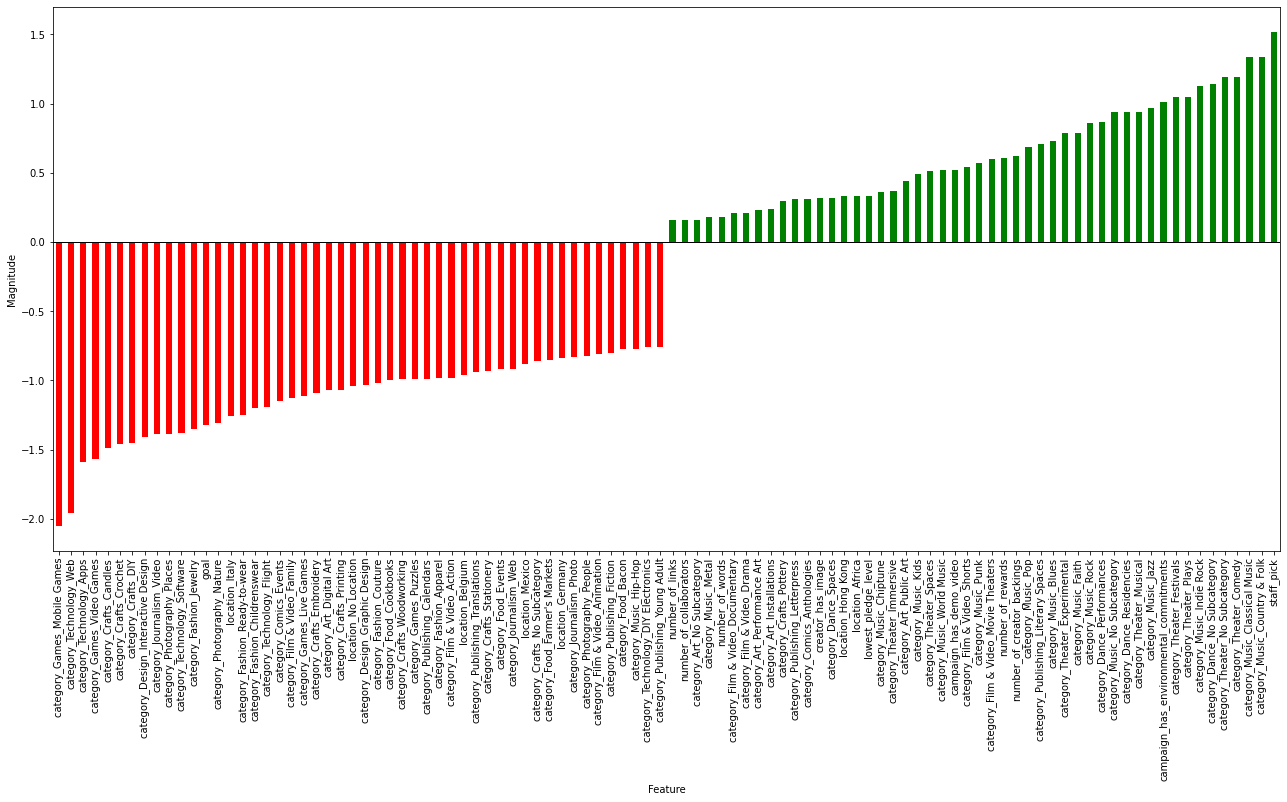

In [ ]:
# Plot the Top 50 Features with the Highest/Lowest Magnitude
coefficients = pd.DataFrame(np.round(best_lr_structured.get_weights()[0],2))
coefficients.rename(columns={0:"magnitude"}, inplace=True)  
coefficients['feature'] = feature_names_structured
coefficients = coefficients.set_index('feature', drop=True)

# Sort coefficients by their magnitude
coefficients.sort_values(by='magnitude', ascending=False, inplace=True)

# Only show the top 50 features with the highest/lowest magnitude
coefficients = coefficients.iloc[:50].append(coefficients.iloc[-50:])

# Plot coefficients
coefficients.plot.bar(figsize=(22,10), legend=None, color=[(coefficients.magnitude > 0).map({True: 'g', False: 'r'})])
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.ylabel("Magnitude")
plt.gca().invert_xaxis()
plt.axhline(linewidth=1, color="black");

In [ ]:
# Plot the coefficients of the Logistic Regression
coefficients = pd.DataFrame(np.round(best_lr_structured.get_weights()[0], 2))
coefficients.rename(columns={0:"magnitude"}, inplace=True)
coefficients['feature'] = feature_names_structured
coefficients = coefficients.set_index('feature', drop=True)

# Sort coefficients by their magnitude
coefficients.sort_values(by='magnitude', ascending=False, inplace=True)

with pd.option_context("display.max_rows", None):
    display(coefficients)

,magnitude
feature,
staff_pick,1.52
category_Music_Country & Folk,1.34
category_Music_Classical Music,1.34
category_Theater_Comedy,1.19
category_Theater_No Subcategory,1.19
category_Dance_No Subcategory,1.14
category_Music_Indie Rock,1.13
category_Theater_Plays,1.05
category_Theater_Festivals,1.05


##### Evaluation of LR Text:

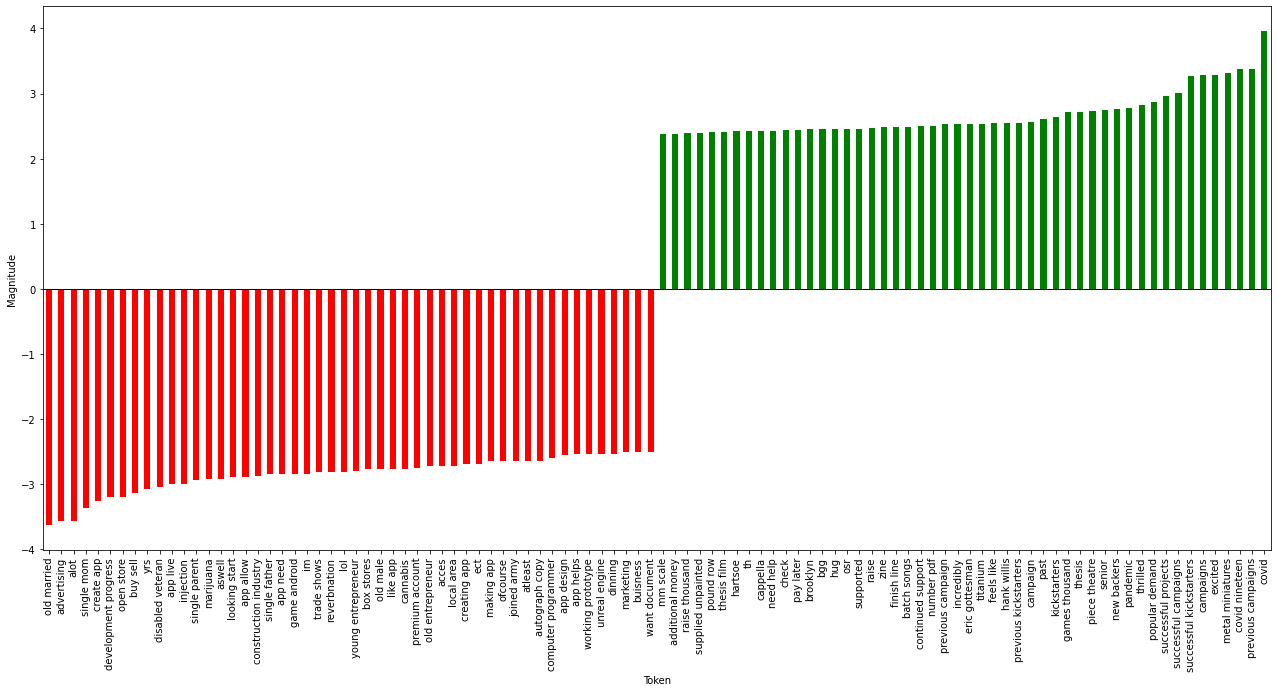

In [ ]:
# Plot the Top 50 Tokens with the Highest/Lowest Magnitude
coefficients = pd.DataFrame(np.round(best_lr_text.get_weights()[0],2))
coefficients.rename(columns={0:"magnitude"}, inplace=True)  
coefficients['feature'] = feature_names_text
coefficients = coefficients.set_index('feature', drop=True)

# Sort coefficients by their magnitude
coefficients.sort_values(by='magnitude', ascending=False, inplace=True)

# Only show the top 50 tokens with the highest/lowest magnitude
coefficients = coefficients.iloc[:50].append(coefficients.iloc[-50:])

# Plot coefficients
coefficients.plot.bar(figsize=(22,10), legend=None, color=[(coefficients.magnitude > 0).map({True: 'g', False: 'r'})])
plt.xlabel("Token")
plt.xticks(rotation=90)
plt.ylabel("Magnitude")
plt.gca().invert_xaxis()
plt.axhline(linewidth=1, color="black");

##### Evaluation of LR Structured + Text:

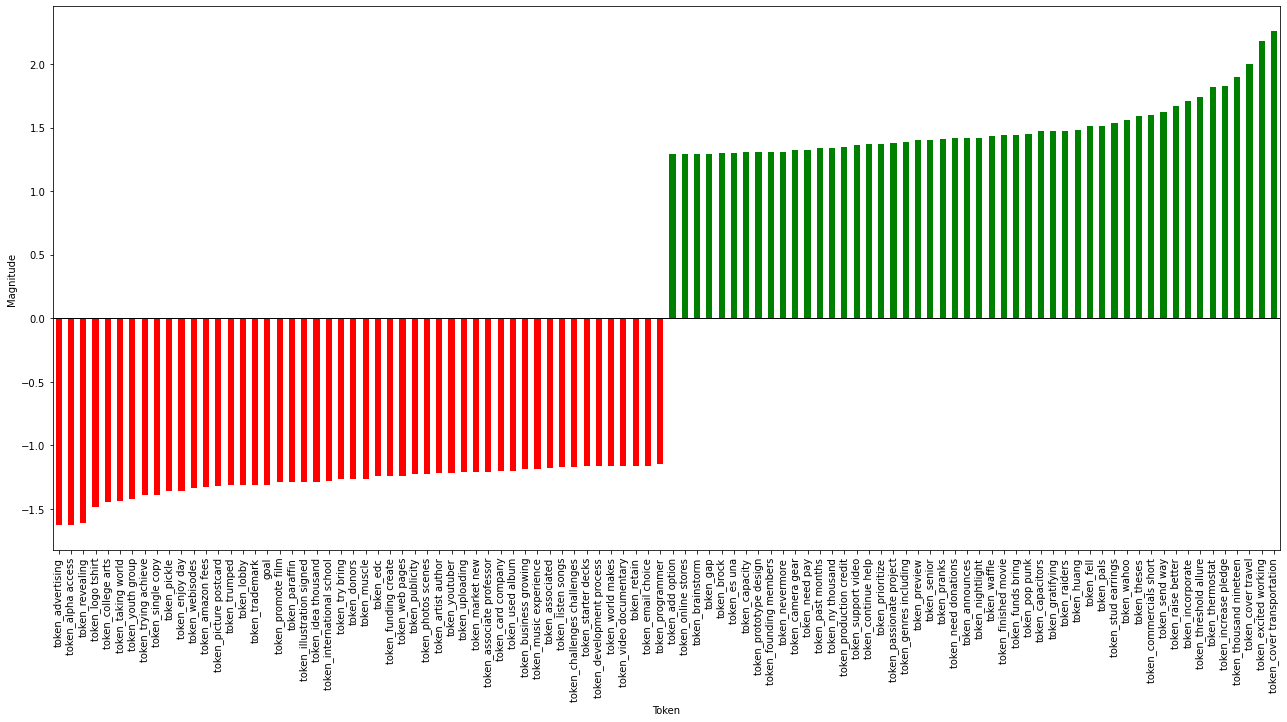

In [ ]:
# Plot the Top 50 Tokens with the Highest/Lowest Magnitude
coefficients = pd.DataFrame(np.round(best_lr_both.get_weights()[0],2))
coefficients.rename(columns={0:"magnitude"}, inplace=True)  
coefficients['feature'] = feature_names_both
coefficients = coefficients.set_index('feature', drop=True)

# Sort coefficients by their magnitude
coefficients.sort_values(by='magnitude', ascending=False, inplace=True)

# Only show the top 50 tokens with the highest/lowest magnitude
coefficients = coefficients.iloc[:50].append(coefficients.iloc[-50:])

# Plot coefficients
coefficients.plot.bar(figsize=(22,10), legend=None, color=[(coefficients.magnitude > 0).map({True: 'g', False: 'r'})])
plt.xlabel("Token")
plt.xticks(rotation=90)
plt.ylabel("Magnitude")
plt.gca().invert_xaxis()
plt.axhline(linewidth=1, color="black");